# Preamble

In [1]:
from scripts.open_preprocess_racmo import *
from scripts.paths import *
from scripts.dicts import *

from sum_freshwater_func import *

import matplotlib.pyplot as plt
import cmcrameri.cm as cmc
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import numpy as np


import pandas as pd

Pathdata: /Volumes/imau01/rapid/RACMO2.3p2/FGRN055
Reading locally reprojected 1k data
Finished reading locally reprojected 1k data
Opening file: 
 /Volumes/imau01/rapid/RACMO2.3p2/FGRN055/Downscaling_GR/Annual/runoff.1958-2023.BN_RACMO2.3p2_ERA5_3h_FGRN055.1km.YY.nc.gz
... 
/Volumes/imau01/rapid/RACMO2.3p2/FGRN055/Downscaling_GR/Annual/runoff.1958-2023.BN_RACMO2.3p2_ERA5_3h_FGRN055.1km.YY.nc.gz
Opened /Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR_500m/Annual/Sums and masks/runoff.1940-2023.BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.GrIS.0.5km.GIC.YY.nc
Opened /Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR_500m/Annual/Sums and masks/runoff.1940-2023.BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.GrIS.0.5km.GrIS.YY.nc
Opened /Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR_500m/Annual/Sums and masks/runoff_yearly_sum.1940-2023.BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.GrIS.0.5km.GIC.YY.nc
Opened /Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR_500m/Annu

# Greenland as a whole

## Annual

### Runoff

#### Runoff Ice Caps and Sheet on Ice 500m - Annual

#### MAR

Open RACMO ice per ice type

### Runoff CARRA

### Solid Discharge

### Precipitation

## Greenland - combined

## Annual timeseries 

Text(0.5, 0.98, 'RACMO runoff 2023')

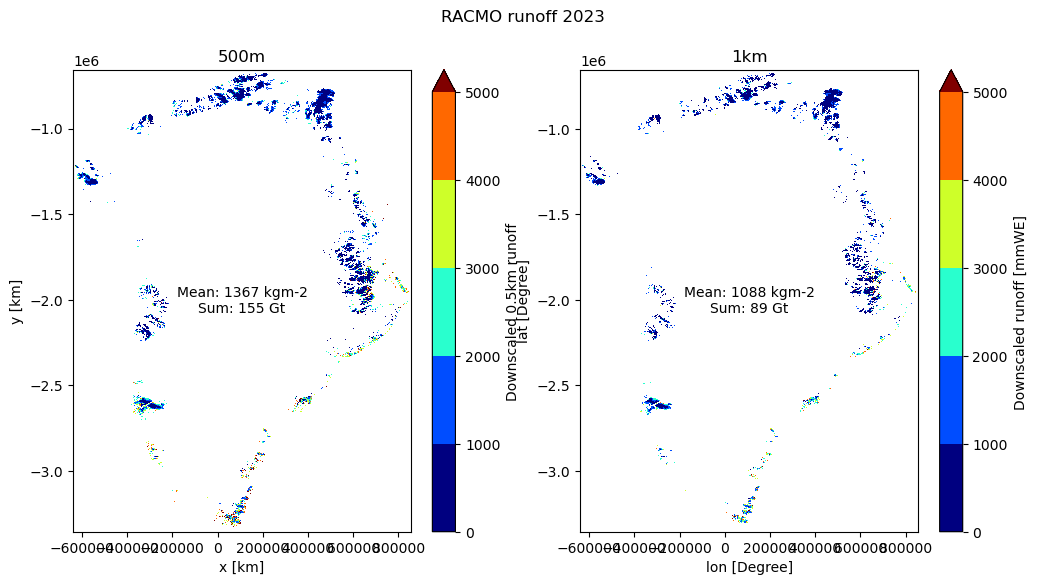

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

levels= np.arange(0,6000, 1e3)
dsRunoff500mRACMO_GIC.sel(time='2023')['runoffcorr'].plot(ax=ax[0],  cmap='jet', levels=levels)
dsRunoff_RACMO_1k_YY_GIC.sel(time='2023').plot(ax=ax[1],cmap='jet', levels=levels)
# give title 500m and 1km
ax[0].set_title('500m')
ax[1].set_title('1km')
# add meanv value in the middle of the plot

ax[0].text(0.5, 0.5, f'Mean: {dsRunoff500mRACMO_GIC.sel(time='2023')['runoffcorr'].mean().values:.0f} kgm-2\nSum: {dsRunoff500mRACMO_GIC.sel(time='2023')['runoffcorr'].sum().values/1e6/4:.0f} Gt',
horizontalalignment='center', verticalalignment='center', transform=ax[0].transAxes)
ax[1].text(0.5, 0.5, f'Mean: {dsRunoff_RACMO_1k_YY_GIC.sel(time='2023').mean().values:.0f} kgm-2\nSum: {dsRunoff_RACMO_1k_YY_GIC.sel(time='2023').sum().values/1e6:.0f} Gt',
 horizontalalignment='center', verticalalignment='center', transform=ax[1].transAxes)

fig.suptitle('RACMO runoff 2023')

In [65]:
# calculate error GrIS

# Select the time range for each dataset
dsRunoff500mRACMO_GrIS_sum_selected = dsRunoff500mRACMO_GrIS_sum.sel(time=slice('1958', '2023'))
dsRunoff500mMAR_GrIS_sum_selected = dsRunoff500mMAR_GrIS_sum.sel(time=slice('1958', '2023'))
dsRunoff_RACMO_1k_YY_GrIS_sum_selected = dsRunoff_RACMO_1k_YY_GrIS_sum.sel(time=slice('1958', '2023'))

mean_GrIS = np.mean(np.concatenate([dsRunoff500mRACMO_GrIS_sum_selected ['runoffcorr'].to_numpy(), (dsRunoff500mMAR_GrIS_sum_selected)['runoffcorr'].to_numpy(), (dsRunoff_RACMO_1k_YY_GrIS_sum_selected).to_numpy()]))




In [90]:
dsRunoff500mRACMO_GIC_sum_selected.mean()/dsRunoff_RACMO_1k_YY_GIC_sum_selected.mean()

1.7986667

In [62]:
# select time between 1991 and 2022 for dsPrecipFjordsVolSum and dsPrecipFjordsCARRA_Annual_Sum
dsPrecipFjordsVolSum_selected = dsPrecipFjordsVolSum.sel(time=slice('1991', '2022'))['precipcorr'].to_numpy()
dsPrecipFjordsCARRA_Annual_Sum_selected = dsPrecipFjordsCARRA_Annual_Sum.sel(time=slice('1991', '2022'))['precip'].to_numpy()

err_ratio_precip = ((dsPrecipFjordsVolSum_selected/dsPrecipFjordsCARRA_Annual_Sum_selected)-1).mean()
mean_precip = np.concatenate([dsPrecipFjordsVolSum_selected, dsPrecipFjordsCARRA_Annual_Sum_selected]).mean()
print(f'Error ratio precip: {err_ratio_precip:.2f}')
print("Mean precip: ", mean_precip)

# the same for GIC
dsRunoff500mRACMO_GIC_sum_selected = dsRunoff500mRACMO_GIC_sum.sel(time=slice('1991', '2022'))['runoffcorr'].to_numpy()
dsRunoff500mMAR_GIC_sum_selected = dsRunoff500mMAR_GIC_sum.sel(time=slice('1991', '2022'))['runoffcorr'].to_numpy()
dsRunoff_RACMO_1k_YY_GIC_sum_selected = dsRunoff_RACMO_1k_YY_GIC_sum.sel(time=slice('1991', '2022')).to_numpy()

err_ratio_GIC = ((dsRunoff500mRACMO_GIC_sum_selected/dsRunoff_RACMO_1k_YY_GIC_sum_selected)-1).mean()
mean_GIC = np.concatenate([dsRunoff500mRACMO_GIC_sum_selected, dsRunoff_RACMO_1k_YY_GIC_sum_selected]).mean()
print(f'Error ratio GIC: {err_ratio_GIC:.2f}')
print(f"Mean GIC: {mean_GIC:.2f}")


Error ratio precip: 0.18
Mean precip:  49.851507408200504
Error ratio GIC: 0.81
Mean GIC: 99.68


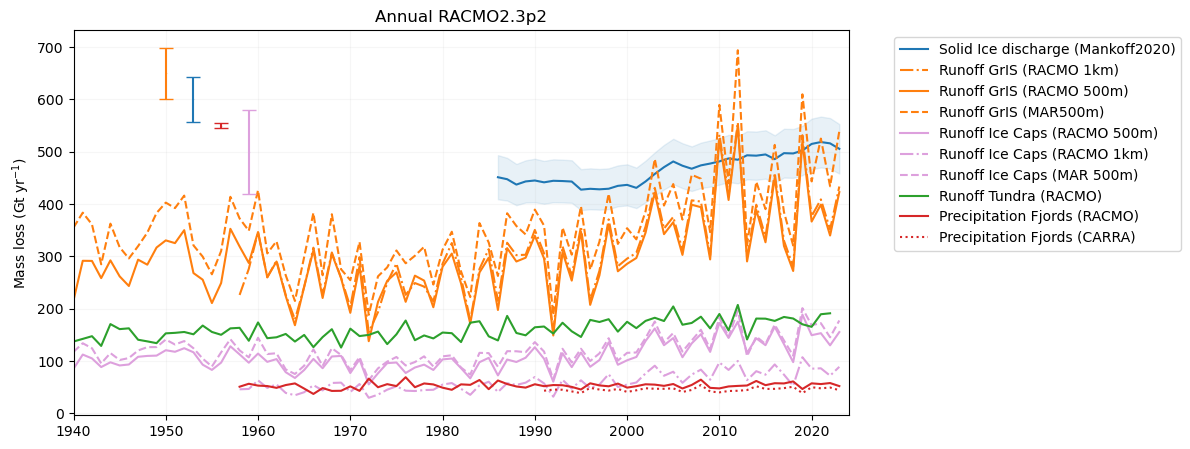

In [69]:
# now make a plot with the runoff and the precipitation and the Mankoff data

dsPrecipFjordsCARRA_Annual_Sum = (ds_precip_carra_1991_2023_sum.sum(dim="section_numbers_adjusted")/1e6).resample(time='YS').sum()


fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.fill_between(pd.to_datetime(dfGISDMankoff.index, format='%Y'), (dfGISDMankoff - dfErrorGISDMankoff.values).squeeze().to_numpy(),(dfGISDMankoff + dfErrorGISDMankoff.values).squeeze().to_numpy(), alpha=0.1, color = dictFWcolor['Solid'])
ax.plot(pd.to_datetime(dfGISDMankoff.index, format='%Y'), dfGISDMankoff, label='Solid Ice discharge (Mankoff2020)', color = dictFWcolor['Solid'])
ax.plot(dsRunoff_RACMO_1k_YY_GrIS_sum.time, dsRunoff_RACMO_1k_YY_GrIS_sum, label="Runoff GrIS (RACMO 1km)", color='tab:orange', linestyle = '-.')
ax.plot(dsRunoff500mRACMO_GrIS_sum.time, dsRunoff500mRACMO_GrIS_sum['runoffcorr'], label="Runoff GrIS (RACMO 500m)", color=dictFWcolor['IceRun'])
ax.plot(dsRunoff500mMAR_GrIS_sum.time, dsRunoff500mMAR_GrIS_sum['runoffcorr'], label="Runoff GrIS (MAR500m)", color=dictFWcolor['IceRun'], linestyle ="--")
ax.plot(dsRunoff500mRACMO_GIC_sum.time, dsRunoff500mRACMO_GIC_sum['runoffcorr'], label="Runoff Ice Caps (RACMO 500m)", color=dictFWcolor['IceCap'])
ax.plot(dsRunoff_RACMO_1k_YY_GIC_sum.time, dsRunoff_RACMO_1k_YY_GIC_sum, label="Runoff Ice Caps (RACMO 1km)", color='plum', linestyle = '-.')
ax.plot(dsRunoff500mMAR_GIC_sum.time, dsRunoff500mMAR_GIC_sum['runoffcorr'], label="Runoff Ice Caps (MAR 500m)", color=dictFWcolor['IceCap'], linestyle ="--")
ax.plot(dsRunoffTundraSum.time, dsRunoffTundraSum, label="Runoff Tundra (RACMO)", color=dictFWcolor['Tundra'])

ax.errorbar(pd.to_datetime("1950"), 650, yerr=mean_GrIS*0.15, fmt='o', markersize=0.1, capsize=5, color=dictFWcolor['IceRun'])
ax.errorbar(pd.to_datetime("1953"), 600, yerr=dfErrorGISDMankoff.mean(), fmt='o', markersize=0.1,  color=dictFWcolor['Solid'], capsize=5)
ax.errorbar(pd.to_datetime("1956"), 550, yerr=mean_precip*err_ratio_precip/2, fmt='o', markersize=0.1, capsize=5, color=dictFWcolor['Precip'])
ax.errorbar(pd.to_datetime("1959"), 500, yerr=mean_GIC*err_ratio_GIC, fmt='o', markersize=0.1, capsize=5, color=dictFWcolor['IceCap'])

# CARRA Runoff
# ax.plot(dsRunoffGrIS_CARRA_YY.time, dsRunoffGrIS_CARRA_YY['sro'].sum(dim='section_numbers_adjusted'), label="Runoff GrIS (CARRA)", color=dictFWcolor['IceRun'], linestyle=":")
# ax.plot(dsRunoffGIC_CARRA_YY.time, dsRunoffGIC_CARRA_YY['sro'].sum(dim='section_numbers_adjusted'), label="Runoff Ice Caps (CARRA)", color=dictFWcolor['IceCap'], linestyle=":")
# ax.plot(dsRunoffTundra_CARRA_YY.time, dsRunoffTundra_CARRA_YY['sro'].sum(dim='section_numbers_adjusted'), label="Runoff Tundra (CARRA)", color=dictFWcolor['Tundra'], linestyle=":")

ax.plot(dsPrecipFjordsVolSum.time, dsPrecipFjordsVolSum['precipcorr'], label="Precipitation Fjords (RACMO)", color=dictFWcolor['Precip'])
ax.plot(dsPrecipFjordsCARRA_Annual_Sum.time, dsPrecipFjordsCARRA_Annual_Sum['precip'], label="Precipitation Fjords (CARRA)", color=dictFWcolor['Precip'], linestyle=":")
# set xlim for first 1939 to 2024
years_xlim = [1940, 2023]
ax.set_xlim([pd.Timestamp(str(years_xlim[0])+"-01-01"), pd.Timestamp(str(years_xlim[1])+"-12-31")])

ax.grid(alpha=0.1)

ax.set_ylabel(r"Mass loss (Gt yr$^{-1}$)")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title(f"Annual RACMO2.3p2")
# save as png
pathFigures = pathGithubFolder+ "results/figures/"

plt.savefig(pathFigures + f"Annual timeseries/RACMO2.3p2_Annual_{years_xlim[0]}-{years_xlim[1]}_with_error_bars.png", dpi=300, bbox_inches='tight')

plt.show()

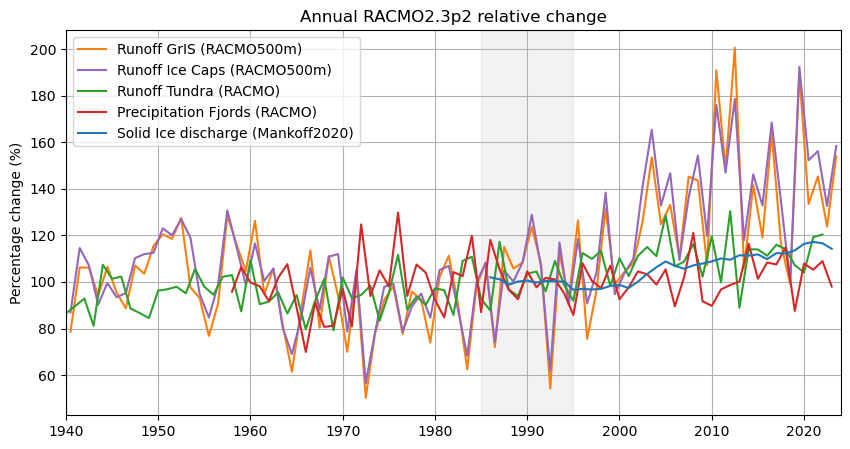

In [ ]:
# Calculate the 10-year average
avg_10yr_RACMO = dsRunoff500mRACMO_GrIS_sum.sel(time=slice('1985', '1994')).mean(dim='time')
avg_10yr_RACMO_GIC = dsRunoff500mRACMO_GIC_sum.sel(time=slice('1985', '1994')).mean(dim='time')
avg_10yr_Tundra = dsRunoffTundraSum.sel(time=slice('1985', '1994')).mean(dim='time')
avg_10yr_Precip = dsPrecipFjordsVolSum.sel(time=slice('1985', '1994')).mean(dim='time')
avg_10yr_Solid = dfGISDMankoff.loc[1985:1995].mean()

# Calculate the percentage change
pct_change_RACMO = (dsRunoff500mRACMO_GrIS_sum ) / avg_10yr_RACMO * 100
pct_change_RACMO_GIC = (dsRunoff500mRACMO_GIC_sum ) / avg_10yr_RACMO_GIC * 100
pct_change_Tundra = (dsRunoffTundraSum ) / avg_10yr_Tundra * 100
pct_change_Precip = (dsPrecipFjordsVolSum ) / avg_10yr_Precip * 100
pct_change_Solid = (dfGISDMankoff ) / avg_10yr_Solid * 100

# Plot the percentage change
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(pct_change_RACMO.time, pct_change_RACMO['runoffcorr'], label="Runoff GrIS (RACMO500m)", color=dictFWcolor['IceRun'])
ax.plot(pct_change_RACMO_GIC.time, pct_change_RACMO_GIC['runoffcorr'], label="Runoff Ice Caps (RACMO500m)", color=dictFWcolor['IceCap'])
ax.plot(pct_change_Tundra.time, pct_change_Tundra, label="Runoff Tundra (RACMO)", color=dictFWcolor['Tundra'])
ax.plot(pct_change_Precip.time, pct_change_Precip['precipcorr'], label="Precipitation Fjords (RACMO)", color=dictFWcolor['Precip'])
ax.plot(pd.to_datetime(dfGISDMankoff.index, format='%Y'),  pct_change_Solid, label='Solid Ice discharge (Mankoff2020)', color = dictFWcolor['Solid'])

# shade area between 1985 and 1995
ax.axvspan(pd.Timestamp('1985-01-01'), pd.Timestamp('1994-12-31'), color='gray', alpha=0.1)


years_xlim = [1940, 2023]
ax.set_xlim([pd.Timestamp(str(years_xlim[0])+"-01-01"), pd.Timestamp(str(years_xlim[1])+"-12-31")])
ax.set_ylabel("Percentage change (%)")
ax.legend()
ax.set_title(f"{time_resolution} RACMO2.3p2 relative change")

ax.grid()
plt.show()

Combine data

In [11]:
dfRunoffRACMOGIC

Runoff Ice Caps
time                 
1940        85.293640
1941       112.494690
1942       105.134216
1943        88.638496
1944        97.730560
...               ...
2019       188.864334
2020       149.486206
2021       153.352814
2022       130.173019
2023       155.479889

[84 rows x 1 columns]

In [37]:
dfPrecipFjordsCARRA.index = dfPrecipFjordsCARRA.index.year
dfRunoff500mMAR_GIC_sum.index = dfRunoff500mMAR_GIC_sum.index.year
dfRunoff500mRACMO_GIC.index = dfRunoff500mRACMO_GIC.index.year
dfRunoff_RACMO_1k_YY_GIC_sum.index = dfRunoff_RACMO_1k_YY_GIC_sum.index.year
dfRunoff500mMAR_GrIS_sum.index = dfRunoff500mMAR_GrIS_sum.index.year
dfRunoff500mRACMO_GrIS_sum.index = dfRunoff500mRACMO_GrIS_sum.index.year
dfRunoff_RACMO_1k_YY_GrIS_sum.index = dfRunoff_RACMO_1k_YY_GrIS_sum.index.year


df_sum_GIS_55 = pd.concat(
    [
        dfSolidMankoff,
        dfRunoff_RACMO_1k_YY_GIC_sum,
        dfRunoff_RACMO_1k_YY_GrIS_sum,
        dfRunoffTundra,
        dfPrecipFjordsVol,
        dfPrecipFjordsCARRA,
        dfRunoff500mMAR_GIC_sum,
        dfRunoff500mMAR_GrIS_sum,
        dfRunoff500mRACMO_GrIS_sum,
        dfRunoffRACMOGrIS,
        dfRunoffRACMOGIC,


    ],
    axis=1,
).sort_index()

if time_resolution == "Monthly":
    df_sum_GIS_55.index = pd.to_datetime(df_sum_GIS_55.index, format="%Y-%m")
else:
    df_sum_GIS_55.index = pd.to_datetime(df_sum_GIS_55.index, format="%Y")

filterNanMonths = (
    df_sum_GIS_55.isna().sum(axis=1) > 0
)  # find months with NaN values in any of the variables
df_sum_GIS_55Relative = (df_sum_GIS_55.iloc[:, :5].mask(filterNanMonths).T / df_sum_GIS_55.iloc[:, :5].sum(axis=1)).T


In [38]:
df_sum_GIS_55.columns

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
FW_type_long = ['Discharge [Gt yr-1]', 'Runoff GrIS', 'Runoff Tundra',
       'Precipitation Fjords', 'Runoff Ice Caps']
dictFWcolor_long = dict(zip(FW_type_long, colors))


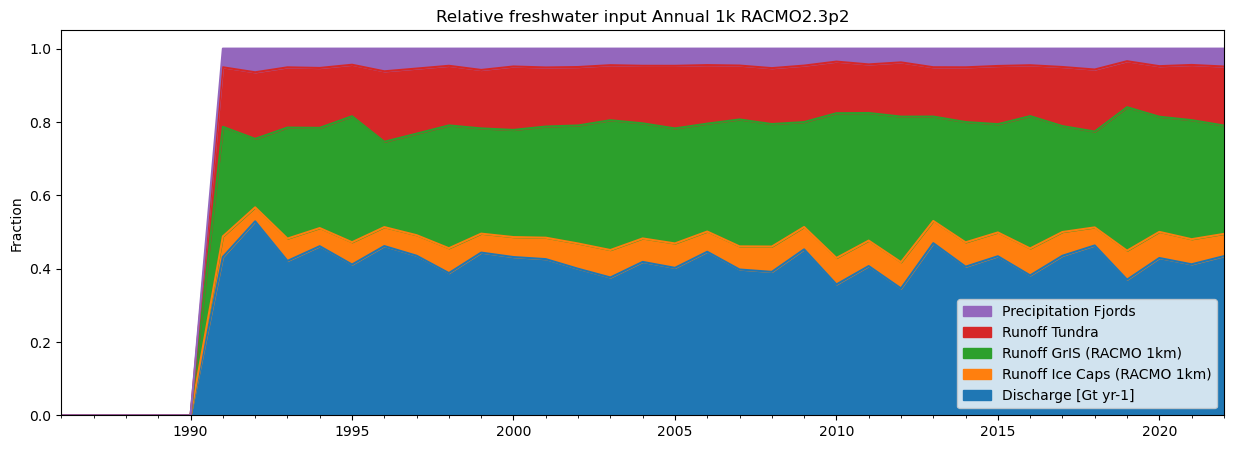

In [41]:
import matplotlib.dates as mdates
from scipy import stats

time_resolution = 'Annual'

fig,ax = plt.subplots( figsize=(15, 5))
# df_sum_GIS_55.plot(kind='line', subplots=True, figsize=(10, 6))
# set colors according to dictFWcolor

df_sum_GIS_55Relative['1986':'2022'].plot(kind='area',stacked=True, ax=ax)#color=[dictFWcolor_long[FW] for FW in df_sum_GIS_55Relative.columns])

# df_sum_GIS_55Relative.plot(kind='bar', ax=ax, stacked=True)
# max 10 ticklabels

# update figsize
# plt.subplots( figsize=(15, 5))
# plt.xticks(rotation=45)
plt.title(f"Relative freshwater input {time_resolution} {spatial_resolution} RACMO2.3p2")
plt.ylabel("Fraction")
# do legend inverse
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels))

plt.show()



In [117]:
import numpy as np
import plotly.graph_objects as go

fig = go.Figure()

# Add linear trend
for col in df_sum_GIS_55.columns:
    x = df_sum_GIS_55['1970':].index.year
    y = df_sum_GIS_55['1970':][col].values

    x= x[~np.isnan(y)]
    y= y[~np.isnan(y)]

    # Add the original data
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name=col)) #line=dict(color=dictFWcolor_long[col])))
    
    # Calculate the linear trend
    trend = np.polyfit(x, y, 1)
    trendline = np.poly1d(trend)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    print(f'p-value for {col} trend: {p_value}')
    
    # Add the trendline
    fig.add_trace(go.Scatter(x=x, y=trendline(x), mode='lines', name=f'Trend, {slope*10:.1f}%/decade \np={p_value:.3f}', line=dict( dash='dash', color='grey')))

# update lyaout to plotly white
fig.update_layout(template='plotly_white', title=f"FW input {time_resolution} RACMO2.3p2", width = 1000, height = 500)
fig.write_image(pathFigures + f"Annual timeseries/RACMO2.3p2_Annual_trend.png")
fig.write_html(pathFigures + f"Annual timeseries/RACMO2.3p2_Annual_trend.html")
fig.show()

p-value for Discharge [Gt yr-1] trend: 2.6641035944098496e-14
p-value for Runoff Ice Caps (RACMO 1km) trend: 4.945213580809934e-12
p-value for Runoff GrIS (RACMO 1km) trend: 4.845627646429324e-09
p-value for Runoff Tundra trend: 1.318271485275408e-06
p-value for Precipitation Fjords trend: 0.722981972176633
p-value for Precipitation Fjords (CARRA) trend: 0.1257273551907334
p-value for Runoff Ice Caps (MAR 500m) trend: 6.127932334737862e-11
p-value for Runoff GrIS (MAR 500m) trend: 2.378626421100962e-09
p-value for Runoff GrIS (RACMO 500m) trend: 7.447362331499465e-09
p-value for Runoff GrIS trend: 7.447362331499465e-09
p-value for Runoff Ice Caps trend: 2.3265338718735604e-11


In [42]:
import numpy as np
import plotly.graph_objects as go

fig = go.Figure()

# Add linear trend
for col in df_sum_GIS_55Relative.columns:
    x = df_sum_GIS_55Relative.index.year
    y = df_sum_GIS_55Relative[col].values*100

    x= x[~np.isnan(y)]
    y= y[~np.isnan(y)]

    # Add the original data
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name=col)) #line=dict(color=dictFWcolor_long[col])))
    
    # Calculate the linear trend
    trend = np.polyfit(x, y, 1)
    trendline = np.poly1d(trend)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    print(f'p-value for {col} trend: {p_value}')
    
    # Add the trendline
    fig.add_trace(go.Scatter(x=x, y=trendline(x), mode='lines', name=f'Trend, {slope*10:.1f}%/decade \np={p_value:.3f}', line=dict( dash='dash')))

# update lyaout to plotly white
fig.update_layout(template='plotly_white', title=f"Relative FW input {time_resolution} RACMO2.3p2", width = 1000, height = 500)
fig.show()

p-value for Discharge [Gt yr-1] trend: 0.12545218231806757
p-value for Runoff Ice Caps (RACMO 1km) trend: 0.001597201644502247
p-value for Runoff GrIS (RACMO 1km) trend: 0.04012152598181766
p-value for Runoff Tundra trend: 0.001625260827936808
p-value for Precipitation Fjords trend: 0.013125734326164668


NameError: name 'col_order_yearly' is not defined

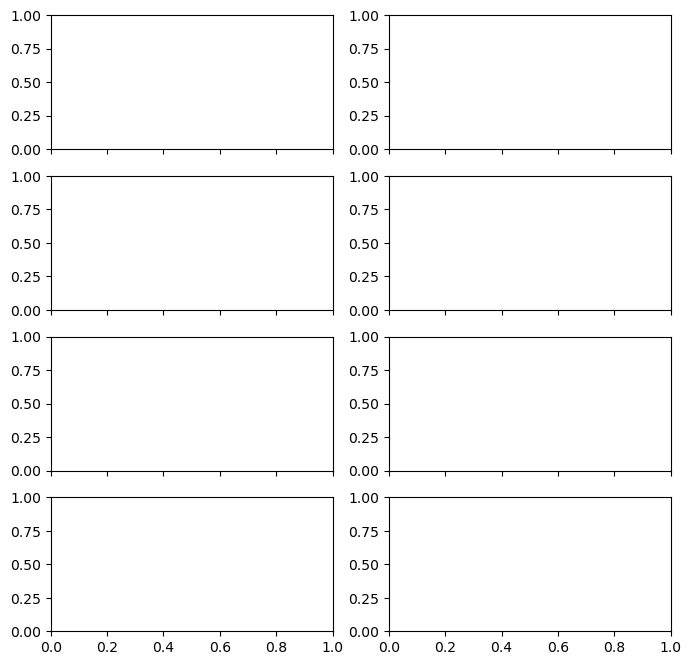

In [35]:
 
 
 col_order_rel_sector = ['Solid Ice Discharge', 'Liquid Runoff Ice Sheet','Liquid Runoff Tundra',  'Liquid Runoff Ice Caps', 'Precipitation Fjords']
pd.options.plotting.backend = "matplotlib"
import warnings
warnings.filterwarnings('ignore')
# rename 'Solid Ice discharge' as 'Solid Ice discharge (weighted mean)'
plt.style.use('default')

# Check if dsSectorSum is in locals, if not read it
if 'dsSectorSum' not in locals():
    dsSectorSum = xr.open_dataset(pathDataTemp + "RACMO2.3p2_1k_sector_sum_2024_06_12.nc")

basin_list_8sub = ['NO','', 'NW', 'NE', 'CW', 'CE', 'SW', 'SE']
basin_alphabet = ['a', '', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
fig, axs = plt.subplots(4,2, sharex=True, figsize=(8, 8), sharey=False)

# extend 'Solid Ice discharge' with 'Solid Ice discharge'
for i, basin in enumerate(basin_list_8sub):
    ax = axs.flatten()[i]
    if basin == '':
        fig.delaxes(axs.flatten()[i])
        continue
    df_single_sector =(dsSectorSum.rename_vars({'Solid Ice discharge (weighted mean)': 'Solid Ice Discharge'})[col_order_yearly].resample(time='YS').mean() * 12).sel(time=slice('1990', '2022')).sel(Basins=basin).to_dataframe().drop(columns='Basins')      

    print("------> " + basin)
    for var in df_single_sector.columns:
        linestyle = dict_linestyle_FW[var]
        df_single_sector[var].plot(kind='line', ax=ax, legend=False, color=dict_colors_FW[var], linestyle=linestyle)

    ax.grid(color = 'gray',alpha = 0.2)
    ymax = df_single_sector.max().max()*1.1
    ax.set_ylim([-ymax/20, ymax])  
    for side in  ['top', 'bottom', 'left', 'right']:
        ax.spines[side].set_visible(False)
    ax.set_xlabel('')
    # remove minor ticks
    ax.set_xticks(pd.date_range('1990', '2022', freq='5Y'), minor=False)
    # set minor ticks 
    ax.set_xticks(pd.date_range('1990', '2022', freq='5Y'), minor=True)
    ax.tick_params( length=0)  # Adjust major tick length as needed

    ax.text(0.05, 1, f"{basin_alphabet[i]}) {basin}", fontsize=14, ha='left', va='top', transform=ax.transAxes, color ='black')
handles, labels = axs.flatten()[0].get_legend_handles_labels()
axs.flatten()[0].legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.1, 0.5), loc='center left', frameon=False, fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
# plt.tight_layout()
plt.show()

# Per sector

In [115]:
def kgperm2_to_Gt(ds):
    ds = ds/1e6
    ds.attrs['units'] = 'Gt'
    return ds

In [83]:
# cmc.roma.colors
# get 8 colors from the roma colormap
colors = cmc.roma.colors
colors = [colors[i] for i in range(0, len(colors), len(colors)//8)]
colors_hex_Moug = [mcolors.rgb2hex(color) for color in colors]
dict_Moug_colors = dict(zip(np.arange(8), colors))


In [117]:

# ice_caps = xr.open_dataset("/Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR/Monthly/runoff_monthly_FGRN055_Downscaled_RACMO2.3p2_RACMO2.3p2_1k_runoff_Monthly_sector_1990_2022_Ice_Caps.nc")

# fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# ice_caps['runoff'].plot(x='time', ax=ax, hue = 'Basins', linestyle='--')
# plt.xlim(pd.Timestamp('2010-01-01'), pd.Timestamp('2010-12-31'))

In [118]:
def mask_MougBasins_ice(ds, IceOrTundra):
    '''Mask the RACMO data with the Mouginot basins and sum the values for each basin
    IceOrTundra: "Ice" or "Tundra" to select the mask to use'''
    if spatial_resolution == '5_5k':

        mask55 = open_mask_5_5k(spatial_resolution)
        mask55['rlat'] = ds['rlat']
        mask55['rlon'] = ds['rlon']

        if IceOrTundra == 'Ice':
            ds['Basins'] = mask55['Basins']
            dsMougTime = ds.groupby('Basins').sum().isel(height=0)
        elif IceOrTundra == 'Tundra':
            ds['Basins'] = mask55['Mouginot_Tundra']
            dsMougTime = ds.groupby('Basins').sum().isel(height=0)
        ds.attrs['Description'] = f"Sum per sector of the Mouginot basins for {spatial_resolution} RACMO2.3p2, for the {IceOrTundra} "
        return dsMougTime
        
    elif spatial_resolution == '1k':
        if not 'masks1k' in globals():
            mask1k = open_mask_1k()
        path_mask_1k_with_tundra = "/Users/annek/Documents/RACMO2.3p2/FGRN055/Downscaling_GR/GrIS_topo_icemask_lsm_tundra_basins_lon_lat_1km.nc"
        mask_1k_with_tundra = xr.open_dataset(path_mask_1k_with_tundra)
        if IceOrTundra == 'Ice':
            ds['Basins'] = mask_1k_with_tundra['Basins_All_Greenland']
            dsMougTime = ds.groupby('Mouginot_basins').sum()
        elif IceOrTundra == 'Tundra':
            ds['Mouginot_basins'] = mask_1k_with_tundra['Tundra_basins']
            dsMougTime = ds.groupby('Mouginot_basins').sum()
        # give a attribute
        ds.attrs['Description'] = f"Sum per sector of the Mouginot basins for {spatial_resolution} RACMO2.3p2, for the {IceOrTundra} "
        return dsMougTime


dict_Moug = {0:"Not GRIS", 1: "NO", 2: "NE", 3: "CE", 4: "SE", 5: "SW", 6: "CW", 7: "NW"}

### Runoff ice sheet

<Axes: title={'center': 'Liquid Runoff Ice Sheet per sector 2010-2012'}, xlabel='time'>

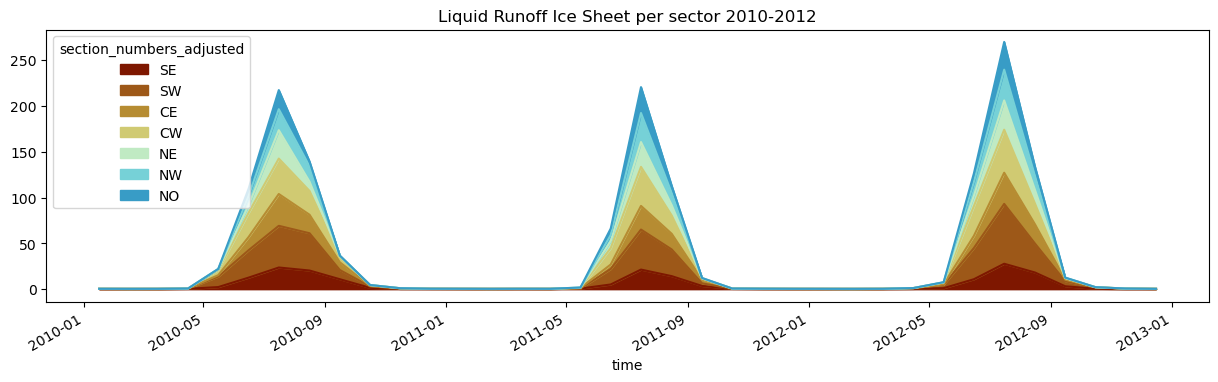

In [119]:
# dsRunoffIceSector = pathAnnekeFolderIMAU02+ "/Downscaling_GR/Monthly/runoff_monthly_FGRN055_Downscaled_RACMO2.3p2_RACMO2.3p2_1k_runoff_Monthly_sector_1990_2022_GrIS_Ice.nc"
# dsRunoffIceSector = xr.open_dataset(dsRunoffIceSector)['runoff']
dsRunoffIceSectormm = xr.open_dataset("/Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR/Monthly/runoff_GrIS.1990-2023.RACMO2.3p2_ERA5_3h_FGRN055.1km.MM.GrIS.section_sum.nc")['runoffcorr']
dsRunoffIceSector = kgperm2_to_Gt(dsRunoffIceSectormm)
dfRunoffIceSector = dsRunoffIceSector.to_dataframe(name='Liquid Runoff Ice Sheet').reset_index().set_index('time').pivot(columns='section_numbers_adjusted').rename(columns=dict_sections)

dfRunoffIceSector.columns = dfRunoffIceSector.columns.get_level_values(1)
dfRunoffIceSector['2010':'2012'].plot(kind='area',stacked=True, color=colors_hex_Moug, figsize=(15, 4), title="Liquid Runoff Ice Sheet per sector 2010-2012")

In [122]:
# if not in locals

if 'dsRunoff500mMAR_GrIS_per_section' not in locals():
    print("Opening the data")
    dsRunoff500mMAR_GrIS_per_section = xr.open_dataset(path_sums_masks_500m+ "runoff.1940-2023.MAR3v14.GrIS.0.5km.GrIS.YY.per_section.nc")
# (dsRunoff500mMAR_GrIS_per_section/1e6).plot(hue = 'section_numbers_adjusted')
# add attributes km3 w.e. per year
dsRunoff500mMAR_GrIS_per_section.attrs['units'] = 'km3 w.e. per year'
dsRunoff500mMAR_GrIS_per_section.attrs['Description'] = 'Sum per sector of the Greenland Ice Sheet for the 500m MAR3.14 data'


### Runoff Ice caps

<Axes: title={'center': 'Liquid Runoff Ice Caps'}, xlabel='time'>

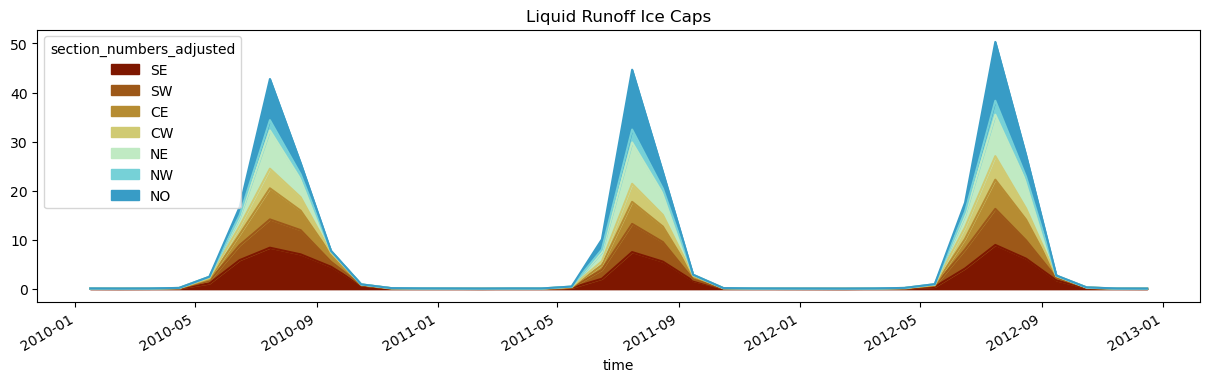

In [50]:
dsRunoffIceCapSectormm = xr.open_dataset("/Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR/Monthly/runoff_GIC.1990-2023.RACMO2.3p2_ERA5_3h_FGRN055.1km.MM.GIC.section_sum.nc")['runoffcorr']
dsRunoffIceCapSector = kgperm2_to_Gt(dsRunoffIceCapSectormm)
dfRunoffIceCapSector = dsRunoffIceCapSector.to_dataframe(name='Liquid Runoff Ice Sheet').reset_index().set_index('time').pivot(columns='section_numbers_adjusted').rename(columns=dict_sections)
dfRunoffIceCapSector.columns = dfRunoffIceCapSector.columns.get_level_values(1)

dfRunoffIceCapSector['2010':'2012'].plot(kind='area',stacked=True, color=colors_hex_Moug, figsize=(15, 4), title = "Liquid Runoff Ice Caps")



In [86]:
dfRunoffIceCapSector.resample('YS').sum().sum(axis=1)

time
1990-01-01     69.542046
1991-01-01     57.385578
1992-01-01     32.048683
1993-01-01     64.220703
1994-01-01     47.554199
1995-01-01     63.278942
1996-01-01     48.085297
1997-01-01     55.167122
1998-01-01     75.052475
1999-01-01     50.684525
2000-01-01     55.166916
2001-01-01     59.160042
2002-01-01     76.486206
2003-01-01     91.182182
2004-01-01     72.010857
2005-01-01     79.726425
2006-01-01     58.536942
2007-01-01     74.217033
2008-01-01     83.711113
2009-01-01     64.398788
2010-01-01     97.502991
2011-01-01     83.148163
2012-01-01    100.249954
2013-01-01     63.661091
2014-01-01     80.743408
2015-01-01     74.070183
2016-01-01     93.631302
2017-01-01     74.089607
2018-01-01     52.887306
2019-01-01    107.396408
2020-01-01     85.560631
2021-01-01     86.221771
2022-01-01     72.187103
2023-01-01     89.050232
Freq: YS-JAN, dtype: float32

In [124]:
if 'dsRunoff500mMAR_GIC_per_section' not in locals():
    print("Opening the data")
    dsRunoff500mMAR_GIC_per_section = xr.open_dataset(path_sums_masks_500m + "runoff.1940-2023.MAR3v14.GIC.0.5km.GIC.YY.per_section.nc")
dsRunoff500mMAR_GIC_per_section

# add units
dsRunoff500mMAR_GIC_per_section.attrs['units'] = 'km3 w.e. per year'
dsRunoff500mMAR_GIC_per_section.attrs['Description'] = 'Sum per sector of the Greenland Ice Caps for the 500m MAR3.14 data'

Opening the data


In [125]:
dfRunoff500mMAR_GIC_per_section = dsRunoff500mMAR_GIC_per_section['runoffcorr'].to_dataframe().reset_index()
dfRunoff500mMAR_GIC_per_section['section_numbers_adjusted'] = dfRunoff500mMAR_GIC_per_section['section_numbers_adjusted'].map(dict_sections)
dfRunoff500mMAR_GIC_per_section = dfRunoff500mMAR_GIC_per_section.set_index('time').pivot(columns='section_numbers_adjusted')/1e6
dfRunoff500mMAR_GIC_per_section.columns = dfRunoff500mMAR_GIC_per_section.columns.get_level_values(1)


### Runoff Tundra

Make tundra section mask 

In [126]:
fname = "/Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR/Mask_adjusted_section_numbers_slater_may24_copy.nc"
mask = xr.open_dataset(fname)
fname = "/Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR/masks1k.nc"
mask1 = xr.open_dataset(fname)
mask_tundra = mask1['LSM'].where(mask1['Promicemask'] == 0)
mask['Tundra_sections'] = mask['section_numbers_adjusted'].where(mask_tundra.values == 1)
mask_tundra_sections = mask['Tundra_sections']
mask_tundra_sections = mask_tundra_sections.rename({'x':'rlon', 'y':'rlat'})


Import monthly data

In [127]:
time_resolution = 'Monthly'
years = list(range(2012, 2023))

dsRunoffTundra_mmyear = read_RACMO('1k_reproject', time_resolution,years=years, variable="runoff")

# rename x and y to rlon and rlat
dsRunoffTundra_mmyear['Tundra_basins'] = mask_tundra_sections
path_monthly_racmo = pathAnnekeFolderIMAU02+ "/Downscaling_GR/Monthly/"
fname_runofftundraMM = f"runoff_tundra.{years[0]}-{years[1]}.RACMO2.3p2_ERA5_3h_FGRN055.1km.MM.tundra.section_sum.nc"

if os.path.isfile(path_monthly_racmo +fname_runofftundraMM):
    dsRunoffTundra_mmyear_SECTOR = xr.open_dataset(path_monthly_racmo +fname_runofftundraMM)
else:
    dsRunoffTundra_mmyear_SECTOR =  dsRunoffTundra_mmyear['runoff'].groupby(dsRunoffTundra_mmyear['Tundra_basins']).sum().drop('height')
    dsRunoffTundra_mmyear_SECTOR.to_netcdf(path_monthly_racmo +fname_runofftundraMM)


    

Reading locally reprojected 1k data
Finished reading locally reprojected 1k data


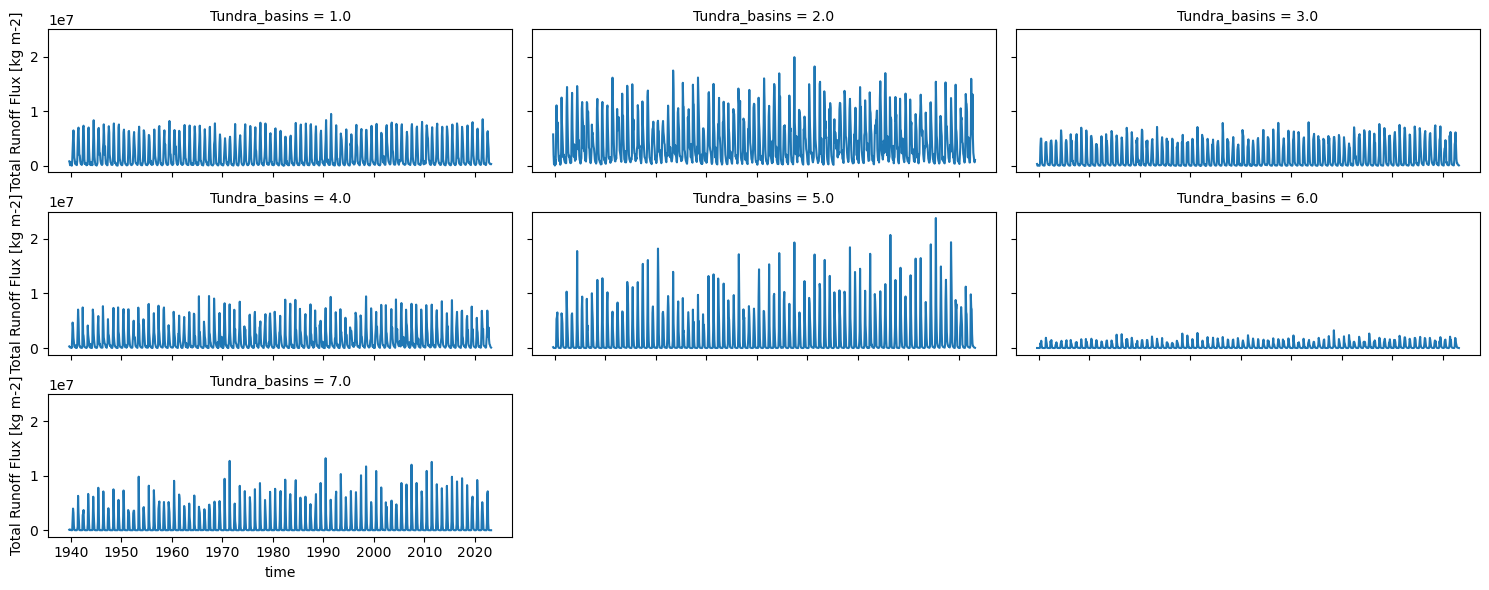

In [128]:
dsRunoffTundra_mmyear_SECTOR['runoff'].plot(x='time', col='Tundra_basins',  col_wrap=3, figsize = (15,6))

Convert tundra from mm to km3 

In [129]:
dfRunoffTundraSector = kgperm2_to_Gt( dsRunoffTundra_mmyear_SECTOR['runoff']).to_dataframe().reset_index().drop(columns='height').set_index('time').pivot(columns='Tundra_basins').rename(columns=dict_sections)

dfRunoffTundraSector.columns = dfRunoffTundraSector.columns.get_level_values(1)
# dfRunoffTundraSector['2010':'2012'].plot(kind='area',stacked=True, color=colors_hex_Moug, figsize=(15, 4), title = "Liquid Runoff Tundra")


## Runoff 

## Solid discharge

In [130]:
dfSectionD = pd.read_csv(path_Mankoff2020Solid_adjusted + "section_D.csv", index_col=0, parse_dates=True)
dfErrorSectionDMankoff = pd.read_csv(path_Mankoff2020Solid_adjusted + "section_err.csv", index_col=0, parse_dates=True)
dfSectionCovManoff = pd.read_csv(path_Mankoff2020Solid_adjusted + "section_coverage.csv", index_col=0, parse_dates=True)
# filterCovReg =  (dfSectionCovManoff < 0.5).values

dfSectionD = dfSectionD/12
dfErrorSectionDMankoff = dfErrorSectionDMankoff/12
dfSectionD.columns.name = "Basins"


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


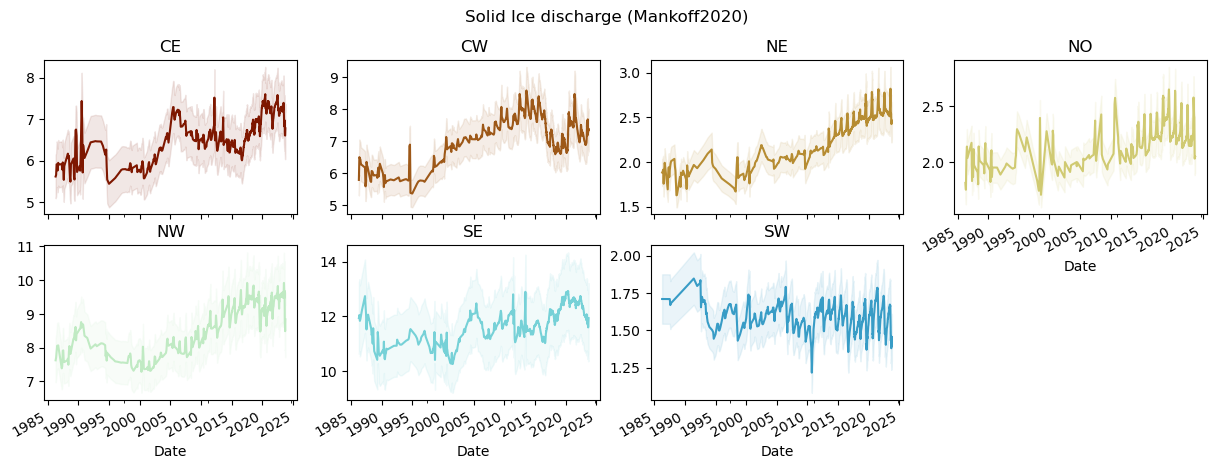

In [131]:
axs  = dfSectionD.plot(subplots=True,figsize=(15, 5), color=colors_hex_Moug, layout=(2, 4), sharex=True, legend=False, title="Solid Ice discharge (Mankoff2020)")

# also plot error as fill between
for i, ax in enumerate(axs.flatten()):
    if i == len(dict_Moug)-1:
        break
    ax.fill_between(dfSectionD.index, (dfSectionD.iloc[:,i] - dfErrorSectionDMankoff.iloc[:,i]).to_numpy(),(dfSectionD.iloc[:,i] + dfErrorSectionDMankoff.iloc[:,i]).to_numpy(), alpha=0.1, color=colors_hex_Moug[i])
    ax.set_title(dfSectionD.columns[i])
plt.legend()

# calculate monthly mean and standard deviation per region

## Precipitation

In [ ]:
# open ds_precip_carra_1991_2023_sum.to_netcdf("/Volumes/imau02/rapid/Anneke/CARRA/Yearly/RACMOgrid/fjords_only/total_precipitation.CARRA.west_domain.1991-2023.1km.YY.fjords_only.sum_per_basin.nc")
ds_precip_carra_1991_2023_sum = xr.open_dataset("/Volumes/imau02/rapid/Anneke/CARRA/Yearly/RACMOgrid/fjords_only/total_precipitation.CARRA.west_domain.1991-2023.1km.YY.fjords_only.sum_per_basin.nc")/1e6
ds_precip_carra_1991_2023_sum.resample(time='YS').sum()


folder_base = "/Volumes/imau02/rapid/Anneke/"


dsPrecipFjords = xr.open_mfdataset(pathDataTemp + "RACMO2.3p2_1km_precip_fjords_Annual_1958_2023.nc")
dsPrecipFjordsAnnualRACMO_58_23 = dsPrecipFjords.copy(deep=True)
mask_sections = (
    folder_base
    + "RACMO2.3p2/FGRN055/Downscaling_GR/Mask_adjusted_section_numbers_slater_may24.nc"
)
dsmask_sections = xr.open_mfdataset(mask_sections)
dsPrecipFjordsSectormm_sum = dsPrecipFjords.groupby(dsmask_sections['section_numbers_adjusted']).sum()
dsPrecipFjordsSectormm_sum = dsPrecipFjordsSectormm_sum.resample(time='YS').sum()

### Load Monthly

In [ ]:
monthly_precip_cara1 = "/Volumes/imau02/rapid/Anneke/CARRA/Monthly/RACMOgrid/fjords_only/total_precipitation.CARRA.west_domain.2009-2023.1km.MM.fjords_only.per_basin.nc"
ds_precip_carra_2009_2023_month = xr.open_dataset(monthly_precip_cara1)/1e6

ds_precip_carra_1991_2008_month = xr.open_dataset("/Volumes/imau02/rapid/Anneke/CARRA/Monthly/RACMOgrid/fjords_only/total_precipitation.CARRA.west_domain.1991-2008.1km.MM.fjords_only.sum_per_basin.nc")/1e6

ds_precip_carra_1991_2023_month = xr.concat([ds_precip_carra_1991_2008_month, ds_precip_carra_2009_2023_month], dim='time')


In [ ]:

ds_precip_racmo_1990_2023_sum_monthly = xr.open_mfdataset("/Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR/Monthly/fjords_only/precip.1990-2023.RACMO2.3p2_ERA5_3h_FGRN055.1km.MM.fjords_sector.nc")

In [ ]:


dfPrecipFjordsSector_RACMO_year = dsPrecipFjordsSectormm_sum.to_dataframe().reset_index().set_index('time').pivot(columns='section_numbers_adjusted').rename(columns=dict_sections)
dfPrecipFjordsSector_RACMO_year.columns = dfPrecipFjordsSector_RACMO_year.columns.get_level_values(1)

dfPrecipFjordsSector_CARRA_year = ds_precip_carra_1991_2023_sum.to_dataframe().reset_index().set_index('time').pivot(columns='section_numbers_adjusted').rename(columns=dict_sections)
dfPrecipFjordsSector_CARRA_year.columns = dfPrecipFjordsSector_CARRA_year.columns.get_level_values(1)


In [ ]:
dfPrecipFjordsSector_RACMO_month = ds_precip_racmo_1990_2023_sum_monthly.to_dataframe().reset_index().set_index('time').pivot(columns='section_numbers_adjusted').rename(columns=dict_sections)
dfPrecipFjordsSector_RACMO_month.columns = dfPrecipFjordsSector_RACMO_month.columns.get_level_values(1)

dfPrecipFjordsSector_CARRA_month = ds_precip_carra_1991_2023_month.to_dataframe().reset_index().set_index('time').pivot(columns='section_numbers_adjusted').rename(columns=dict_sections)
dfPrecipFjordsSector_CARRA_month.columns = dfPrecipFjordsSector_CARRA_month.columns.get_level_values(1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


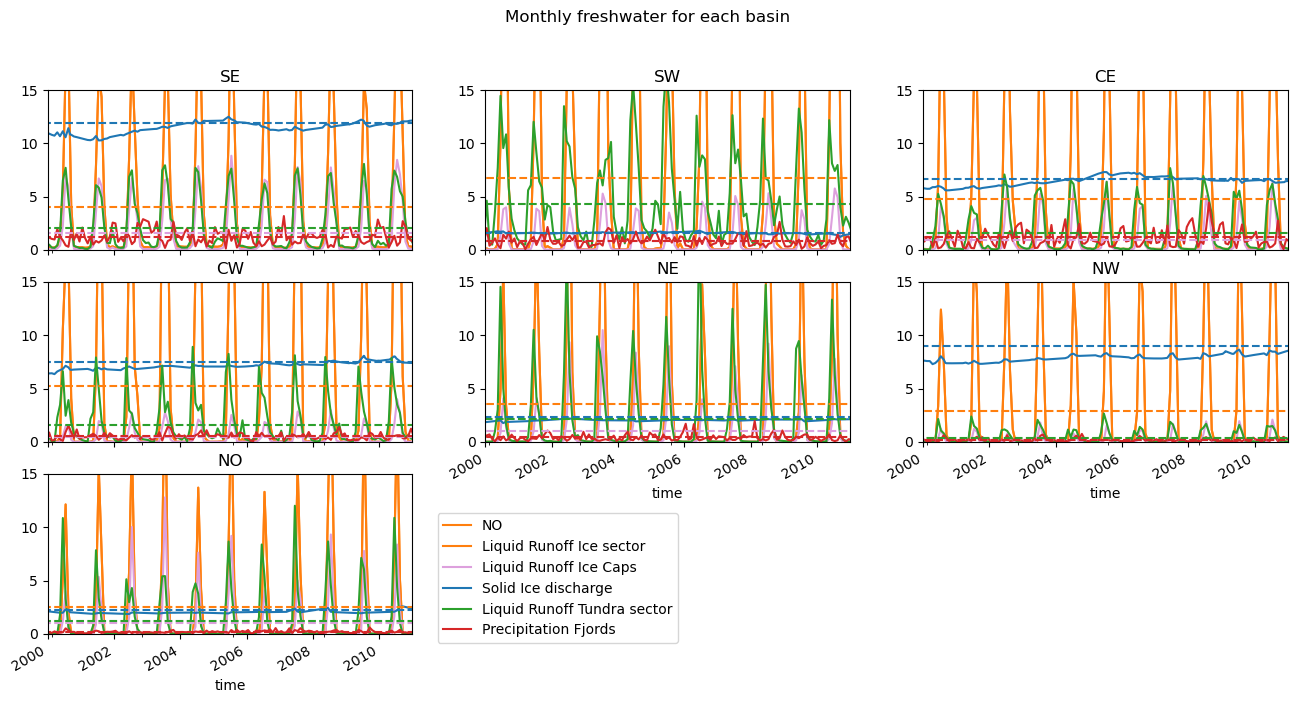

In [138]:
# fig, axs = plt.subplots(3, 3, figsize=(16, 8), sharex=True)

time_resolution ="Monthly"
axs = dfRunoffIceSector.plot.line(color='tab:orange', subplots=True,layout=(3,3), figsize=(16, 8), legend=False, sharey=False, label="")

for i, basin in enumerate(dfRunoffIceSector.columns):
    basin_name = basin
    ax = axs.flatten()[i]
    
    dfRunoffIceSector[basin_name].plot.line( ax=ax, label="Liquid Runoff Ice sector", color='tab:orange')
    dfRunoffIceCapSector[basin_name].plot.line( ax=ax, label="Liquid Runoff Ice Caps", color='plum')
    (dfSectionD[basin_name]).plot.line( ax=ax, label="Solid Ice discharge", color='tab:blue')
    dfRunoffTundraSector[basin_name].plot.line( ax=ax, label="Liquid Runoff Tundra sector", color='tab:green')
    (dfPrecipFjordsSector_RACMO_month[basin_name]/1e6).plot.line( ax=ax, label="Precipitation Fjords", color='tab:red')

    # add mean
    ax.hlines(dfRunoffIceSector.mean()[basin_name], xmin=dfRunoffIceSector.index[0], xmax=dfRunoffIceSector.index[-1], color='tab:orange', linestyle='--')
    ax.hlines(dfRunoffIceCapSector.mean()[basin_name], xmin=dfRunoffIceCapSector.index[0], xmax=dfRunoffIceCapSector.index[-1], color='plum', linestyle='--')
    ax.hlines(dfSectionD.mean()[basin_name], xmin=dfSectionD.index[0], xmax=dfSectionD.index[-1], color='tab:blue', linestyle='--')
    ax.hlines(dfRunoffTundraSector.mean()[basin_name], xmin=dfRunoffTundraSector.index[0], xmax=dfRunoffTundraSector.index[-1], color='tab:green', linestyle='--')
    ax.hlines(dfPrecipFjordsSector_RACMO_month.mean()[basin_name]/1e6, xmin=dfPrecipFjordsSector_RACMO_month.index[0], xmax=dfPrecipFjordsSector_RACMO_month.index[-1], color='tab:red', linestyle='--')

    

    ax.title.set_text(basin_name)
    ax.set_ylim([0, 15])


fig = axs[0, 0].figure
# title Monthly freshwater for each basin
plt.suptitle(f"{time_resolution} freshwater for each basin")

if time_resolution == 'Monthly':
    ax.set_xlim([pd.to_datetime("2000-01-01"), pd.to_datetime('2010') + pd.DateOffset(years=1)])
elif time_resolution == 'Annual':
    ax.set_xlim([pd.to_datetime(years[0]), pd.to_datetime('2023') + pd.DateOffset(years=1)])
plt.legend()

axs.flatten()[6].legend(bbox_to_anchor=(1.05, -0.1), loc='lower left')
plt.show()

## Per sector - combined

In [131]:
dict_colors_FW

{'Liquid Runoff Ice Sheet': 'tab:orange',
 'Liquid Runoff Ice Caps': 'plum',
 'Liquid Runoff Tundra': 'tab:green',
 'Precipitation Fjords': 'tab:red',
 'Solid Ice discharge (weighted mean)': 'tab:blue',
 'Solid Ice Discharge': 'tab:blue',
 'Precipitation Fjords CARRA': 'tab:red'}

In [16]:
open_previous = True

if open_previous:
    dsSectorSum = xr.open_dataset(pathDataTemp + "RACMO2.3p2_1k_sector_sum_2024_06_12.nc")

else:


    dsSectorSum = xr.merge([ 
        dfRunoffIceSector.stack().to_xarray().to_dataset(name="Liquid Runoff Ice Sheet").rename({'section_numbers_adjusted':'Basins'}),
        dfRunoffIceCapSector.stack().to_xarray().to_dataset(name="Liquid Runoff Ice Caps").rename({'section_numbers_adjusted':'Basins'}),
        dfRunoffTundraSector.stack().to_xarray().to_dataset(name="Liquid Runoff Tundra").rename({'Tundra_basins':'Basins'}), 
        dfPrecipFjordsSector_RACMO_month.stack().to_xarray().to_dataset(name="Precipitation Fjords").rename({'section_numbers_adjusted':'Basins'}),
        dfPrecipFjordsSector_CARRA_month.stack().to_xarray().to_dataset(name="Precipitation Fjords CARRA").rename({'section_numbers_adjusted':'Basins'}),
    ]
    )
    # dsSectorSumD['Solid Ice discharge original'] = dfRegionDMankoff.stack().to_xarray()
    # dsSectorSum['Solid Ice discharge (interp)'] = dsSectorSum['Solid Ice discharge original'].interp(Date=dsSectorSum.time, method='linear')
    # # groupby month and mean
    # dsSectorSum['Solid Ice discharge (mean)'] = dsSectorSum['Solid Ice discharge original'].groupby('Date.month').mean()


    def compute_weighted_monthly_mean(data):
        # Calculate the weights as the difference between each date and the previous date

        diff_next = data.Date.diff('Date').shift(Date=-1).dt.days
        diff_prev = data.Date.diff('Date').dt.days
        diff = (diff_next + diff_prev) / 2
        weights = diff
        total_weights = weights.resample(Date='1ME').sum()

        # Compute the weighted mean
        weighted_data = data * weights
        weighted_sum = weighted_data.resample(Date='1ME').sum()
        weighted_mean = weighted_sum / total_weights
        weighted_mean['Date'] = weighted_mean.Date - pd.Timedelta(15, unit='D')
        return weighted_mean

    def compute_monthly_mean(data):
        return data.resample(Date='1ME').mean()

    dsSectorSum['Solid Ice discharge (weighted mean)'] = compute_weighted_monthly_mean(dfSectionD.stack().to_xarray()).interp(Date=dsSectorSum.time, method='nearest').drop('Date')

    #
    # export dsSectorSum to csv
    start = dsSectorSum.time[0].dt.strftime('%Y').values
    end = dsSectorSum.time[-1].dt.strftime('%Y').values
    dsSectorSum.to_netcdf(pathDataTemp + f"RACMO2.3p2_1k_sector_sum_2024_06_13.nc")

dsSectorSum = dsSectorSum.where(dsSectorSum != 0)

In [17]:

# dsSectorSum.resample(time='MS').mean().to_dataframe().reset_index().set_index('time').to_csv(pathDataTemp + f"RACMO2.3p2_1k_sector_sum_2024_06_12.csv")

(dsSectorSum.resample(time='YS').mean()*12).sum(dim='Basins').to_dataframe().reset_index().set_index('time').to_csv(pathDataTemp + f"Greenland_Sum_2024_06_12.csv")

In [18]:
# find data with the following pattern: pathDataTemp + f"RACMO2.3p2_1k_sector_sum_{start}_{end}.nc")
import glob

# Define the start and end
start = 'your_start_value'
end = 'your_end_value'

# Construct the pattern
pattern = pathDataTemp + f"RACMO2.3p2_1k_sector_sum_*.nc"

# Use glob to find files that match this pattern
matching_files = glob.glob(pattern)
print(matching_files)

['/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/PhD Anneke Vries - General/freshwaterII/data/temp/RACMO2.3p2_1k_sector_sum_2024_06_12.nc', '/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/PhD Anneke Vries - General/freshwaterII/data/temp/RACMO2.3p2_1k_sector_sum_1939_2023_2024_06_12.nc', '/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/PhD Anneke Vries - General/freshwaterII/data/temp/RACMO2.3p2_1k_sector_sum_1939_2023.nc']


In [19]:
# if we have loaded dsSectorSum in memory
if not 'dsSectorSum' in locals():
    dsSectorSum = xr.open_dataset(pathDataTemp + f"RACMO2.3p2_1k_sector_sum_1939_2023_2024_06_12.nc")

In [21]:
# Calculate the mean of each DataArray in the Dataset
means = {var: dsSectorSum[var].mean().item() for var in dsSectorSum.data_vars}

# Convert the means to a DataFrame
variables_sorted = pd.DataFrame(list(means.items()), columns=['Variable', 'Mean']).sort_values(by='Mean', ascending=False)["Variable"].values

dsSectorSum = dsSectorSum[variables_sorted]

In [56]:
# plot ds solid discharge
col_order_abs = ['Solid Ice Discharge', 'Precipitation Fjords',  'Liquid Runoff Tundra', 'Liquid Runoff Ice Caps','Liquid Runoff Ice Sheet', ]
col_order_rel = ['Solid Ice Discharge',   'Liquid Runoff Ice Sheet', 'Liquid Runoff Ice Caps','Liquid Runoff Tundra','Precipitation Fjords', ]

#### Plot stacked percent

In [30]:
# df_single_sector = dsSectorSum.sel(Basins=basin).to_dataframe().drop(columns='Basins').resample('MS').mean().drop(columns='Precipitation Fjords CARRA')
# # if any is nan set all to nan

# df_single_sector

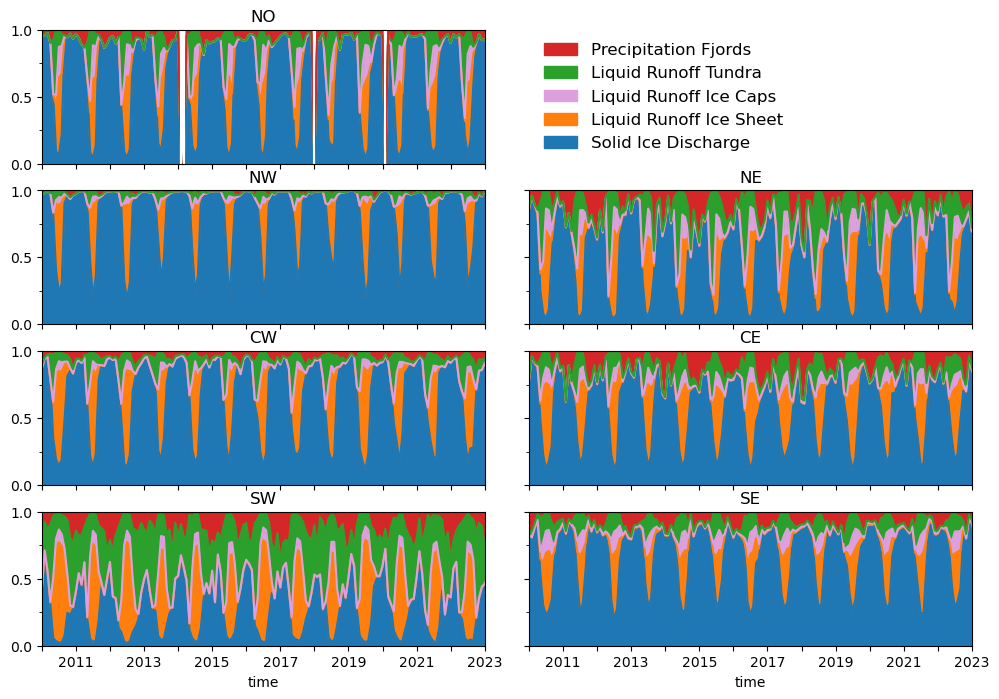

In [64]:
basin_list_8sub = ['NO','', 'NW', 'NE', 'CW', 'CE', 'SW', 'SE']
fig, axs = plt.subplots(4,2, sharex=True, figsize=(12, 8), sharey=True)
ylims = [0, 1]


lines, labels = [], []

# change labels of legend from Solid Ice discharge (weighted mean) to Solid Ice discharge 
dict_shorter_name = {'Solid Ice discharge (weighted mean)': 'Solid Ice Discharge'}

# extend 'Solid Ice discharge' with 'Solid Ice discharge'
for i, basin in enumerate(basin_list_8sub):
    ax = axs.flatten()[i]
    if basin == '':
        fig.delaxes(axs.flatten()[i])
        continue
    df_single_sector = dsSectorSum.sel(Basins=basin).to_dataframe().drop(columns='Basins').resample('MS').mean().drop(columns='Precipitation Fjords CARRA')
    # if any is nan set all to nan
    df_single_sector = df_single_sector.where(~df_single_sector.isna().any(axis=1), np.nan)
    nans = df_single_sector.isna().any(axis=1).index[df_single_sector.isna().any(axis=1)]

    # rename columns
    df_single_sector.columns = [dict_shorter_name.get(col, col) for col in df_single_sector.columns]
    df_single_sector = (df_single_sector.T/(df_single_sector.sum(axis=1).values)).T
    df_single_sector = df_single_sector[col_order_rel]
    df_single_sector.plot(kind='area', stacked=True,  ax=ax,  legend=False, color=[dict_colors_FW[var] for var in df_single_sector.columns])
    # scatter nans on y 1
    ax.vlines(nans, ylims[0], ylims[1], color='white',)

    ax.set_yticks([0, 0.5, 1])
    ax.set_yticks(np.arange(0, 1.1, 0.25), minor=True)
    ax.title.set_text(basin)
    ax.set_xticks(pd.date_range(start='2010', end='2024', freq='YS'))
    # ax.set_xtickla

ax.set_ylim(ylims)
ax.set_xlim([pd.to_datetime("2010"), pd.to_datetime("2022") + pd.DateOffset(years=1)])

plt.subplots_adjust(wspace=0.1)
handles, labels = axs.flatten()[0].get_legend_handles_labels()
axs.flatten()[0].legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.1, 0.5), loc='center left', frameon=False, fontsize=12)

# 
# save figure
plt.savefig(pathFigures + f"Relative_freshwater_per_sector_monthly_{start}_{end}_1k.png", dpi=300, bbox_inches='tight', transparent=True)

Text(0, 0.5, 'Mass loss (Gt)')

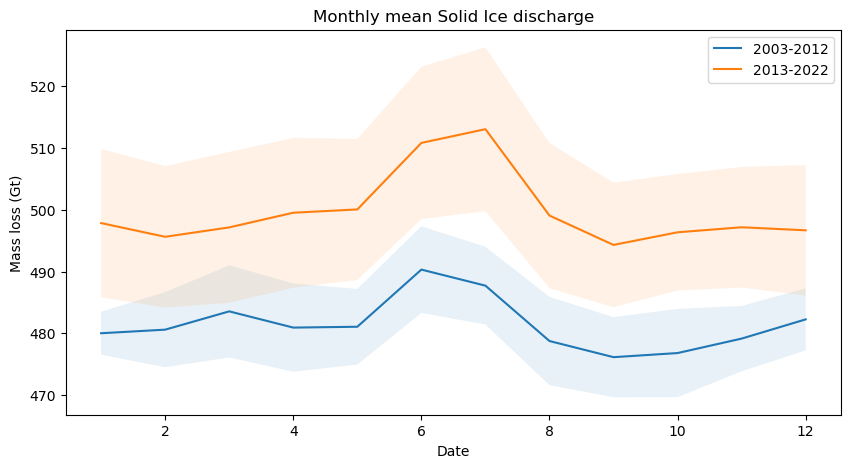

In [29]:

dfGISDMankoff = pd.read_csv(path_Mankoff2020Solid + "GIS_D.csv", index_col=0, parse_dates=True)


dfGISDMankoff2003_2012 = dfGISDMankoff['2003':'2012']
dfGISDMankoff2003_2012 = dfGISDMankoff2003_2012.groupby(dfGISDMankoff2003_2012.index.month).mean().rename(columns={"Discharge [Gt yr-1]": "mean"})
dfGISDMankoff2003_2012['std'] = dfGISDMankoff['2003':'2012'].groupby(dfGISDMankoff['2003':'2012'].index.month).std()

dfGISD_2013_2022 = dfGISDMankoff['2013':'2022']
dfGISD_2013_2022 = dfGISD_2013_2022.groupby(dfGISD_2013_2022.index.month).mean().rename(columns={"Discharge [Gt yr-1]": "mean"})
dfGISD_2013_2022['std'] = dfGISDMankoff['2013':'2022'].groupby(dfGISDMankoff['2013':'2022'].index.month).std()

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

dfGISDMankoff2003_2012['mean'].plot( title='Monthly mean Solid Ice discharge', ax=ax, label = "2003-2012")
dfGISD_2013_2022['mean'].plot(ax=ax, label = "2013-2022")

ax.fill_between(dfGISDMankoff2003_2012.index, (dfGISDMankoff2003_2012['mean'] - dfGISDMankoff2003_2012['std']).to_numpy(),(dfGISDMankoff2003_2012['mean'] + dfGISDMankoff2003_2012['std']).to_numpy(), alpha=0.1)
ax.fill_between(dfGISD_2013_2022.index, (dfGISD_2013_2022['mean'] - dfGISD_2013_2022['std']).to_numpy(),(dfGISD_2013_2022['mean'] + dfGISD_2013_2022['std']).to_numpy(), alpha=0.1)
ax.legend( )
ax.set_ylabel("Mass loss (Gt)")

# data_mean_seasonal_period1['Solid Ice discharge (weighted mean)'].values =np.squeeze(dfGISDMankoff2003_2012['mean'].values)
 

In [176]:
dict_colors_FW

{'Liquid Runoff Ice Sheet': 'tab:orange',
 'Liquid Runoff Ice Caps': 'plum',
 'Liquid Runoff Tundra': 'tab:green',
 'Precipitation Fjords': 'tab:red',
 'Solid Ice discharge (weighted mean)': 'tab:blue',
 'Solid Ice Discharge': 'tab:blue',
 'Precipitation Fjords CARRA': 'tab:red'}

# Specific sector, specific year

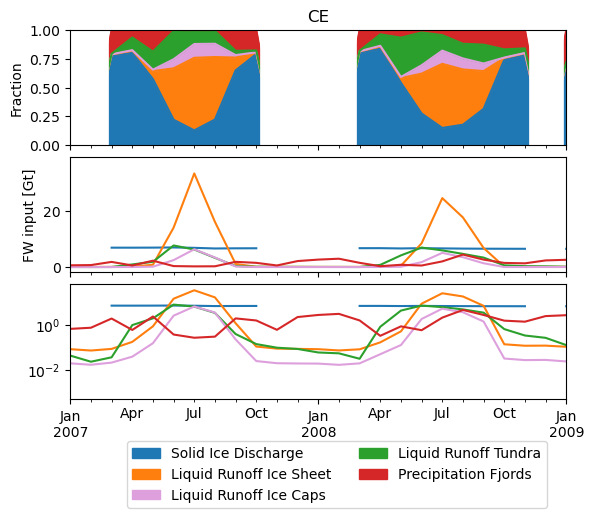

Solid Ice discharge (weighted mean)  Liquid Runoff Ice Sheet  \
time                                                                       
2007-01-01                                  NaN                     0.10   
2007-02-01                                  NaN                     0.08   
2007-03-01                                 0.78                     0.01   
2007-04-01                                 0.80                     0.02   
2007-05-01                                 0.57                     0.07   
2007-06-01                                 0.22                     0.44   
2007-07-01                                 0.13                     0.63   
2007-08-01                                 0.22                     0.54   
2007-09-01                                 0.65                     0.11   
2007-10-01                                 0.79                     0.01   
2007-11-01                                  NaN                     0.11   
2007-12-01                                  NaN                     0.04   
2008-01-01                                  NaN                     0.03   
2008-02-01                                  NaN                     0.02   
2008-03-01                                 0.80                     0.01   
2008-04-01                                 0.84                     0.02   
2008-05-01                                 0.54                     0.04   
2008-06-01                                 0.28                     0.35   
2008-07-01                                 0.15                     0.55   
2008-08-01                                 0.18                     0.48   
2008-09-01                                 0.32                     0.33   
2008-10-01                                 0.74                     0.02   
2008-11-01                                 0.78                     0.01   
2008-12-01                                  NaN                     0.04   

            Liquid Runoff Tundra  Liquid Runoff Ice Caps  Precipitation Fjords  
time                                                                            
2007-01-01                  0.05                    0.02                  0.82  
2007-02-01                  0.03                    0.02                  0.87  
2007-03-01                  0.00                    0.00                  0.21  
2007-04-01                  0.11                    0.00                  0.07  
2007-05-01                  0.16                    0.01                  0.19  
2007-06-01                  0.24                    0.08                  0.01  
2007-07-01                  0.12                    0.12                  0.00  
2007-08-01                  0.11                    0.11                  0.01  
2007-09-01                  0.04                    0.02                  0.18  
2007-10-01                  0.02                    0.00                  0.18  
2007-11-01                  0.12                    0.02                  0.75  
2007-12-01                  0.04                    0.01                  0.92  
2008-01-01                  0.02                    0.01                  0.94  
2008-02-01                  0.02                    0.01                  0.96  
2008-03-01                  0.00                    0.00                  0.18  
2008-04-01                  0.10                    0.01                  0.04  
2008-05-01                  0.34                    0.01                  0.07  
2008-06-01                  0.28                    0.07                  0.02  
2008-07-01                  0.13                    0.11                  0.05  
2008-08-01                  0.13                    0.10                  0.12  
2008-09-01                  0.16                    0.07                  0.13  
2008-10-01                  0.07                    0.00                  0.17  
2008-11-01                  0.04                    0.00                  0.16  
2008-12-01

In [257]:
 def select_basin_time(basin):
     return dsSectorSum.sel(Basins=basin).to_dataframe().drop(columns='Basins').resample('MS').mean().drop(columns=['Precipitation Fjords CARRA', 'adjusted_year'])


def make_plot_basin_years(basin,years):
    df_basin = select_basin_time(basin)
    fig, axs = plt.subplots(3,1,sharex=True)

    df_basin.plot(ax=axs[1], legend=False, color=[dict_colors_FW[var] for var in df_basin.columns])
    nans = df_basin.isna().any(axis=1).index[df_basin.isna().any(axis=1)]
    df_basin_rel = df_basin.where(~df_basin.isna().any(axis=1), np.nan)

    # rename columns
    df_basin_rel.columns = [dict_shorter_name.get(col, col) for col in df_basin_rel.columns]
    df_basin_rel = (df_basin_rel.T/(df_basin_rel.sum(axis=1).values)).T
    df_basin_rel = df_basin_rel[col_order_rel]
    df_basin_rel.plot(kind='area', stacked=True,  ax=axs[0],  legend=False, color=[dict_colors_FW[var] for var in df_basin_rel.columns])

    linewidth = 50/(int(years[1])- int(years[0]))
    axs[0].vlines(nans, 0, 1,color='white',linewidth=linewidth)
    axs[0].legend(ncol=2, loc='upper left', bbox_to_anchor=(0.1, -2.5))
    axs[0].set_ylim([0, 1])
    axs[0].set_ylabel("Fraction")
    axs[1].set_ylabel("FW input [Gt]")

    df_basin.plot(ax=axs[2], legend=False, color=[dict_colors_FW[var] for var in df_basin.columns])
    nans = df_basin.isna().any(axis=1).index[df_basin.isna().any(axis=1)]
    # y log
    axs[2].set_yscale('log')

    # set vspace
    axs[-1].set_xlabel("")
    plt.subplots_adjust(hspace=0.1)
    plt.xlim(years)
    axs[0].set_title(basin)
    plt.show()

yrs = ['2007', '2009']
sector = "CE"

make_plot_basin_years(sector,yrs)
select_basin_time(sector)[yrs[0]:yrs[1]].round(1).tail(24)
(select_basin_time(sector)[yrs[0]:yrs[1]].T/ select_basin_time(sector)[yrs[0]:yrs[1]].sum(axis=1)).round(2).T.head(24)

# select_basin_time("CE")[yrs[0]:yrs[1]].groupby(select_basin_time("CE")[yrs[0]:yrs[1]].index.month).mean().round(2)

In [227]:
xr.open_dataset("/Users/annek/Documents/RACMO2.3p2/FGRN055/Downscaling_GR_500m/GrIS_topo_icemask_lsm_lon_lat_0.5km.nc")

<xarray.Dataset> Size: 452MB
Dimensions:      (y: 5400, x: 2992)
Coordinates:
  * x            (x) float32 12kB -6.392e+05 -6.387e+05 ... 8.558e+05 8.563e+05
  * y            (y) float32 22kB -3.355e+06 -3.354e+06 ... -6.553e+05
Data variables:
    GIC          (y, x) float32 65MB ...
    GrIS         (y, x) float32 65MB ...
    LSM          (y, x) float32 65MB ...
    Promicemask  (y, x) float32 65MB ...
    Topography   (y, x) float32 65MB ...
    lat          (y, x) float32 65MB ...
    lon          (y, x) float32 65MB ...
Attributes:
    CDI:                        Climate Data Interface version 2.1.1 (https:/...
    Conventions:                CF-1.5
    institution:                IMAU (Brice Noel)
    grid:                       Map Projection:Polar Stereographic Ellipsoid ...
    netcdf:                     4.9.2 of May  1 2023 09:08:29 $
    title:                      Bare ice albedo Greenland 2000
    NCO:                        netCDF Operators version 5.1.4 (Homepage = ht...
    history_of_appended_files:  Sun Nov  5 10:08:01 2023: Appended file Expos...
    GDAL_AREA_OR_POINT:         Area
    GDAL:                       GDAL 3.7.2, released 2023/09/05
    history:                    Fri Apr 12 13:37:34 2024: ncks -v Topography,...
    CDO:                        Climate Data Operators version 2.1.1 (https:/...

# Seasonal cycle entire Greenland

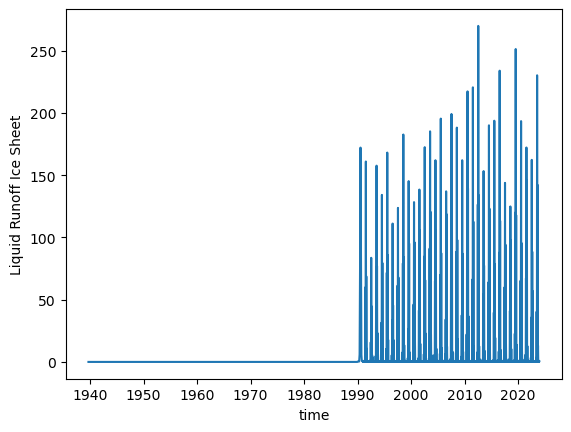

In [39]:
dsSectorSum.sum(dim='Basins')['Liquid Runoff Ice Sheet'].plot()

Text(0, 0.5, 'Fraction')

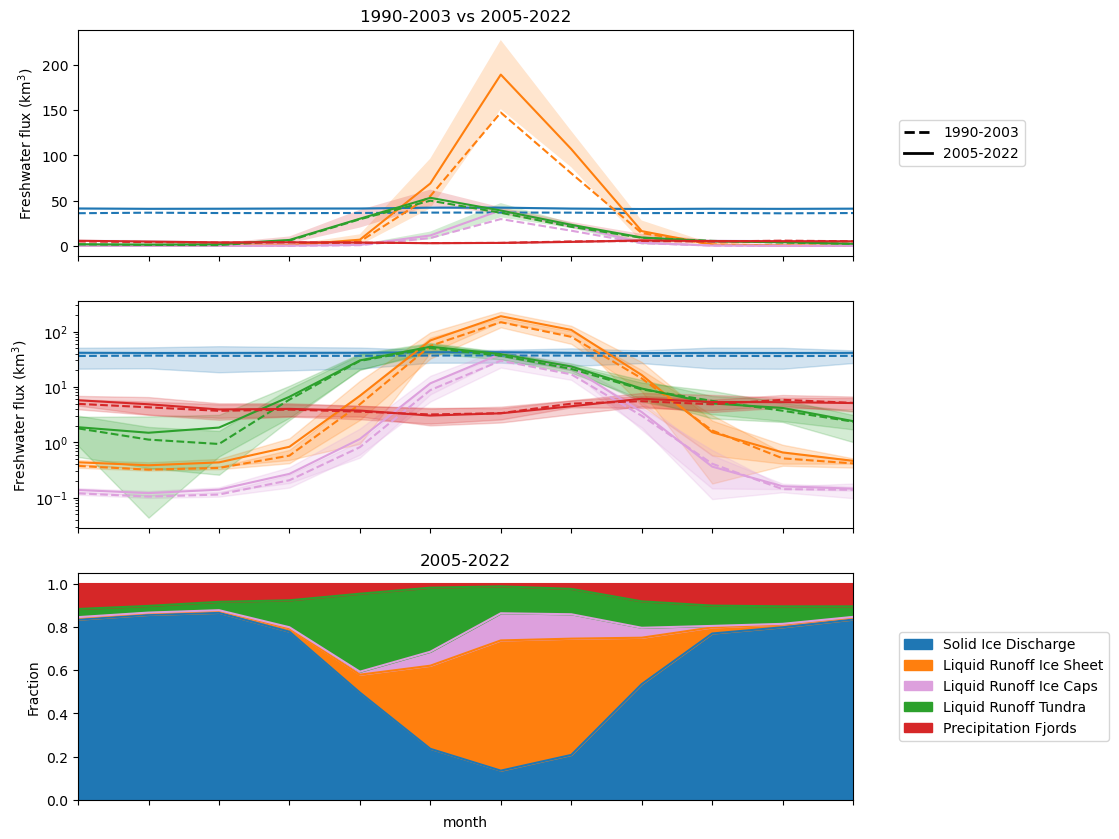

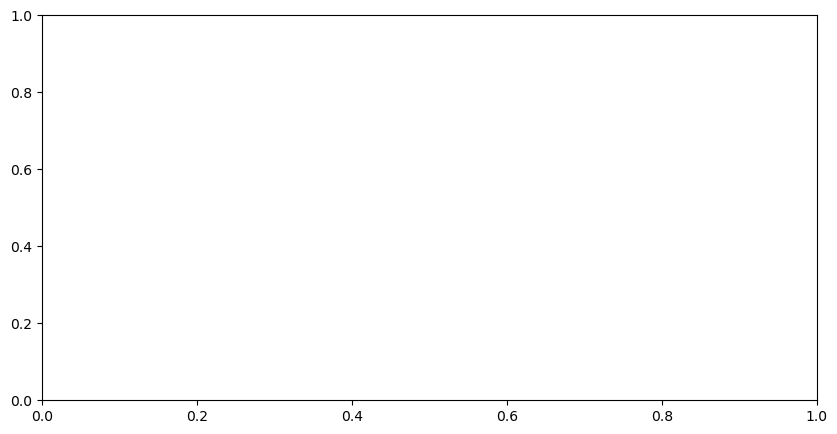

In [4]:
from matplotlib.lines import Line2D
# make a list of all the names of data variables in dsSectorSum


# change labels of legend from Solid Ice discharge (weighted mean) to Solid Ice discharge 
dict_shorter_name = {'Solid Ice discharge (weighted mean)': 'Solid Ice Discharge'}



# Create a new figure
fig, axs = plt.subplots(3,1, sharex=True, figsize = (10, 10))
fig_extra, _ = plt.subplots(1,1, sharex=True, sharey=True, figsize = (10, 5))
axs_extra = axs[1]
# axs_extra.set_ylim([0, 20])
# add log scale
axs_extra.set_yscale('log')



ax = axs[0]
# Loop over the data variables and plot each one with its standard deviation
for var in data_mean_seasonal_period2.data_vars:
    # Plot the mean
    data_mean_seasonal_period2[var].plot(ax=ax, label=var, color=dict_colors_FW[var])
    ax.fill_between(data_mean_seasonal_period2['month'], data_mean_seasonal_period2[var] - data_std_seasonal_period2[var], data_mean_seasonal_period2[var] + data_std_seasonal_period2[var], alpha=0.2)
    data_mean_seasonal_period1[var].plot(ax=ax, label=var, linestyle='--', color=dict_colors_FW[var])

    data_mean_seasonal_period2[var].plot(ax=axs_extra, label=var, color=dict_colors_FW[var])
    axs_extra.fill_between(data_mean_seasonal_period2['month'], data_mean_seasonal_period2[var] - data_std_seasonal_period2[var], data_mean_seasonal_period2[var] + data_std_seasonal_period2[var], alpha=0.2, color=dict_colors_FW[var])
    data_mean_seasonal_period1[var].plot(ax=axs_extra, label=var, color=dict_colors_FW[var], linestyle='--')
    axs_extra.fill_between(data_mean_seasonal_period2['month'], data_mean_seasonal_period1[var] - data_std_seasonal_period1[var], data_mean_seasonal_period1[var] + data_std_seasonal_period1[var], alpha=0.2, color=dict_colors_FW[var])


handles = [Line2D([0], [0], color='black', linewidth=2, linestyle='--'),  # Dashed line for 2003-2012
           Line2D([0], [0], color='black', linewidth=2)]  # Solid line for 2013-2022
ax.legend(handles, [f"{period1['start']}-{period1['end']}", f"{period2['start']}-{period2['end']}"], bbox_to_anchor=(1.05, 0.5), loc='center left')
ax.set_ylabel(r'Freshwater flux (km$^3$)')
ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_title(f"{period1['start']}-{period1['end']} vs {period2['start']}-{period2['end']}")
axs_extra.set_ylabel(r'Freshwater flux (km$^3$)')


# do the second in percentage and stacked area
ax = axs[2]
data_mean_perc = data_mean_seasonal_period2.to_dataframe()
data_mean_perc = (data_mean_perc.T/(data_mean_perc.sum(axis=1).values)).T
data_mean_perc.plot(kind='area', stacked=True, ax=ax, color=[dict_colors_FW[var] for var in data_mean_perc.columns])
ax.title.set_text(f"{period2['start']}-{period2['end']}")
ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
ax.set_xticks(np.arange(1, 13))
ax.set_xlim([1, 12])
ax.set_ylabel('Fraction')


In [41]:
# Select June, July, and August for every year
summer_months = dsSectorSum.sel(time=dsSectorSum['time'].dt.month.isin([6, 7, 8]))

# Group by year and sum over these months
summer_sum_per_year = summer_months.groupby('time.year').mean()*3

summer_sum_per_year



<xarray.Dataset> Size: 20kB
Dimensions:                              (Basins: 7, year: 84)
Coordinates:
  * Basins                               (Basins) <U2 56B 'SE' 'SW' ... 'NO'
  * year                                 (year) int64 672B 1940 1941 ... 2023
Data variables:
    Solid Ice discharge (weighted mean)  (year, Basins) float64 5kB nan ... 7...
    Liquid Runoff Ice Sheet              (year, Basins) float32 2kB nan ... 4...
    Liquid Runoff Tundra                 (year, Basins) float32 2kB 15.82 ......
    Liquid Runoff Ice Caps               (year, Basins) float32 2kB nan ... 18.6
    Precipitation Fjords                 (year, Basins) float32 2kB nan ... 0...
    Precipitation Fjords CARRA           (year, Basins) float64 5kB nan ... 0...
    adjusted_year                        (year) float64 672B 5.82e+03 ... 6.0...

In [44]:
summer_sum_per_year.sel(Basins='SW').to_dataframe().drop(columns=['Basins','adjusted_year'])

Solid Ice discharge (weighted mean)  Liquid Runoff Ice Sheet  \
year                                                                 
1940                                  NaN                      NaN   
1941                                  NaN                      NaN   
1942                                  NaN                      NaN   
1943                                  NaN                      NaN   
1944                                  NaN                      NaN   
...                                   ...                      ...   
2019                             4.614678                99.534378   
2020                             4.708711                77.740036   
2021                             4.826124                80.941452   
2022                             4.840347                61.070580   
2023                             4.706773                88.520714   

      Liquid Runoff Tundra  Liquid Runoff Ice Caps  Precipitation Fjords  \
year                                                                       
1940             22.531788                     NaN                   NaN   
1941             17.467567                     NaN                   NaN   
1942             28.876606                     NaN                   NaN   
1943             24.380207                     NaN                   NaN   
1944             33.778179                     NaN                   NaN   
...                    ...                     ...                   ...   
2019             17.551455               13.465250              0.996668   
2020             23.921715                9.270230              3.202831   
2021             32.809654                8.578460              4.086204   
2022             32.730690                7.373711              2.955293   
2023                   NaN                9.708082              2.846221   

      Precipitation Fjords CARRA  
year                              
1940                         NaN  
1941                         NaN  
1942                         NaN  
1943                         NaN  
1944                         NaN  
...                          ...  
2019                    0.811366  
2020                    2.645583  
2021                    3.494235  
2022                    2.456053  
2023                    2.197910  

[84 rows x 6 columns]

In [31]:
import xarray as xr

# Function to adjust December to the next year for correct winter grouping
def adjust_winter_year(time):
    year = time.dt.year
    month = time.dt.month
    # If month is December, consider it as part of the next year
    adjusted_year = xr.where(month == 12, year + 1, year)
    return adjusted_year

# Adjust the time coordinate for winter grouping
dsSectorSum['adjusted_year'] = adjust_winter_year(dsSectorSum['time'])

# Select December, January, and February
winter_months = dsSectorSum.sel(time=dsSectorSum['time'].dt.month.isin([12, 1, 2]))

# Group by the adjusted year and sum over these months
winter_sum_per_year = winter_months.groupby('adjusted_year').mean()*3

# winter_sum_per_year now contains the sum of values over December, January, and February for every winter season

/Users/annek/opt/anaconda3/envs/phdIIfresh/lib/python3.12/site-packages/xarray/core/dataset.py:4744: UserWarning: No index created for dimension adjusted_year because variable adjusted_year is not a coordinate. To create an index for adjusted_year, please first call `.set_coords('adjusted_year')` on this object.
  warnings.warn(


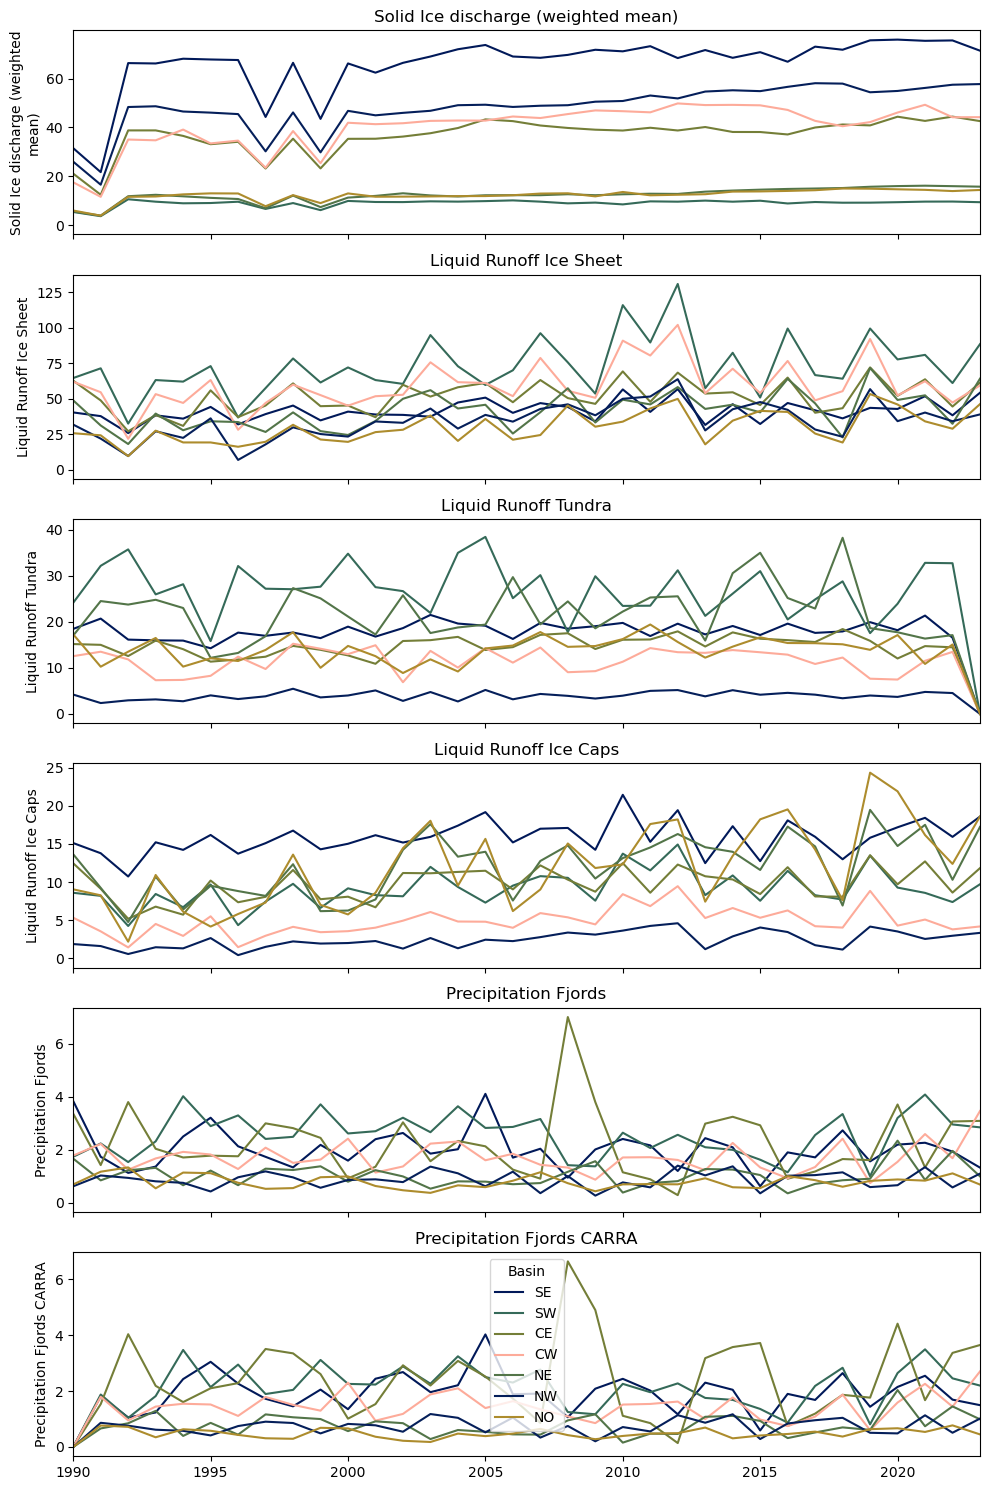

In [40]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Assuming ds is your xarray dataset
ds = summer_sum_per_year
# Your dataset


fig, axs = plt.subplots(6,1, figsize=(10, 15), sharex=True)

for j, var_name in enumerate(ds.data_vars):
    for i, basin in enumerate(ds.Basins):
        # Assuming time is your dimension for plotting
        ds.sel(Basins=basin)[var_name].plot(label=str(basin.values), color=colors_hex_region[i], ax=axs[j])
    axs[j].set_title(var_name)
    axs[j].set_xlabel("")
plt.legend(title='Basin')

axs[j].set_xlim(1990, 2023)
plt.tight_layout()
plt.show()

<xarray.Dataset> Size: 20kB
Dimensions:                              (Basins: 7, time: 85)
Coordinates:
  * Basins                               (Basins) <U2 56B 'SE' 'SW' ... 'NO'
  * time                                 (time) datetime64[ns] 680B 1939-01-0...
Data variables:
    Solid Ice discharge (weighted mean)  (time, Basins) float64 5kB nan ... 2...
    Liquid Runoff Ice Sheet              (time, Basins) float32 2kB nan ... 4...
    Liquid Runoff Tundra                 (time, Basins) float32 2kB 6.743 ......
    Liquid Runoff Ice Caps               (time, Basins) float32 2kB nan ... 1...
    Precipitation Fjords                 (time, Basins) float32 2kB nan ... 2...
    Precipitation Fjords CARRA           (time, Basins) float64 5kB nan ... 1...
    adjusted_year                        (time) float64 680B 2.327e+04 ... 2....

In [118]:
std_err

0.176160647633937

In [121]:
import numpy as np
import plotly.graph_objects as go
from scipy import stats


for basin in dict_sections.values():
    fig = go.Figure()

    # df = summer_sum_per_year.sel(Basins=basin).sel(year=slice(1990, None)).to_dataframe().drop(columns=['Basins','adjusted_year'])
    df = (dsSectorSum.resample(time='YS').mean()*12).sel(Basins=basin).sel(time=slice("1990", "2022")).to_dataframe().drop(columns=['Basins','adjusted_year'])
    df.index = df.index.year

    # Add linear trend
    for col in df.columns:
        x = df.index
        y = df[col].values

        x= x[~np.isnan(y)]
        y= y[~np.isnan(y)]

        # Add the original data
        fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name=col)) #line=dict(color=dictFWcolor_long[col])))
        
        # Calculate the linear trend
        trend = np.polyfit(x, y, 1)
        trendline = np.poly1d(trend)

        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        print(f'p-value for {col} trend: {p_value:.3f}')
        
        # Add the trendline
        fig.add_trace(go.Scatter(x=x, y=trendline(x), mode='lines', name=f'Trend, {slope*10:.1f} (+-{std_err*10:.1f}) Gt/decade, {slope*10/np.mean(y)*100:.1f}%,   p={p_value:.3f}', line=dict( dash='dash', color='grey')))

    # update lyaout to plotly white
    fig.update_layout(template='plotly_white', title=f"trend in {basin}")
    fig.show()

p-value for Solid Ice discharge (weighted mean) trend: 0.000
p-value for Liquid Runoff Ice Sheet trend: 0.033
p-value for Liquid Runoff Tundra trend: 0.304
p-value for Liquid Runoff Ice Caps trend: 0.047
p-value for Precipitation Fjords trend: 0.194
p-value for Precipitation Fjords CARRA trend: 0.327


p-value for Solid Ice discharge (weighted mean) trend: 0.021
p-value for Liquid Runoff Ice Sheet trend: 0.024
p-value for Liquid Runoff Tundra trend: 0.836
p-value for Liquid Runoff Ice Caps trend: 0.021
p-value for Precipitation Fjords trend: 0.424
p-value for Precipitation Fjords CARRA trend: 0.627


p-value for Solid Ice discharge (weighted mean) trend: 0.000
p-value for Liquid Runoff Ice Sheet trend: 0.023
p-value for Liquid Runoff Tundra trend: 0.002
p-value for Liquid Runoff Ice Caps trend: 0.016
p-value for Precipitation Fjords trend: 0.336
p-value for Precipitation Fjords CARRA trend: 0.339


p-value for Solid Ice discharge (weighted mean) trend: 0.000
p-value for Liquid Runoff Ice Sheet trend: 0.026
p-value for Liquid Runoff Tundra trend: 0.187
p-value for Liquid Runoff Ice Caps trend: 0.005
p-value for Precipitation Fjords trend: 0.608
p-value for Precipitation Fjords CARRA trend: 0.543


p-value for Solid Ice discharge (weighted mean) trend: 0.000
p-value for Liquid Runoff Ice Sheet trend: 0.007
p-value for Liquid Runoff Tundra trend: 0.043
p-value for Liquid Runoff Ice Caps trend: 0.001
p-value for Precipitation Fjords trend: 0.378
p-value for Precipitation Fjords CARRA trend: 0.218


p-value for Solid Ice discharge (weighted mean) trend: 0.000
p-value for Liquid Runoff Ice Sheet trend: 0.001
p-value for Liquid Runoff Tundra trend: 0.002
p-value for Liquid Runoff Ice Caps trend: 0.001
p-value for Precipitation Fjords trend: 0.238
p-value for Precipitation Fjords CARRA trend: 0.161


p-value for Solid Ice discharge (weighted mean) trend: 0.000
p-value for Liquid Runoff Ice Sheet trend: 0.001
p-value for Liquid Runoff Tundra trend: 0.619
p-value for Liquid Runoff Ice Caps trend: 0.000
p-value for Precipitation Fjords trend: 0.617
p-value for Precipitation Fjords CARRA trend: 0.894


In [102]:
df

Solid Ice discharge (weighted mean)  Liquid Runoff Ice Sheet  \
time                                                                 
1990                                  NaN                 0.002270   
1990                                  NaN                 0.002056   
1990                             1.934856                 0.001768   
1990                             1.925061                 0.002170   
1990                             1.820142                 0.008880   
...                                   ...                      ...   
2022                             2.147187                 0.002087   
2022                             2.161486                      NaN   
2022                             2.161486                 0.001991   
2022                             2.164300                      NaN   
2022                             2.164300                 0.001702   

      Liquid Runoff Tundra  Liquid Runoff Ice Caps  Precipitation Fjords  \
time                                                                       
1990          2.421099e-05                0.001297              0.151154   
1990          4.687511e-07                0.001135              0.107637   
1990                   NaN                0.000976              0.192829   
1990          2.359380e-05                0.001213              0.433091   
1990          4.283395e-01                0.008236              0.173805   
...                    ...                     ...                   ...   
2022          1.580768e-02                0.001279              0.225100   
2022                   NaN                     NaN                   NaN   
2022          4.861995e-03                0.000921              0.070659   
2022                   NaN                     NaN                   NaN   
2022          1.438902e-03                0.000860              0.182033   

      Precipitation Fjords CARRA  
time                              
1990                         NaN  
1990                         NaN  
1990                         NaN  
1990                         NaN  
1990                         NaN  
...                          ...  
2022                         NaN  
2022                    0.063936  
2022                         NaN  
2022                    0.139996  
2022                         NaN  

[780 rows x 6 columns]

In [239]:
df

Basins  Solid Ice discharge (weighted mean)  \
adjusted_year                                               
1990              NO                                  NaN   
1991              NO                             5.849195   
1992              NO                             5.659050   
1993              NO                             5.959146   
1994              NO                             5.819142   
1995              NO                             6.783903   
1996              NO                             6.284231   
1997              NO                             6.166708   
1998              NO                             5.492846   
1999              NO                             5.825772   
2000              NO                             6.309722   
2001              NO                                  NaN   
2002              NO                             5.697862   
2003              NO                             5.807534   
2004              NO                                  NaN   
2005              NO                                  NaN   
2006              NO                             6.077849   
2007              NO                             6.166685   
2008              NO                                  NaN   
2009              NO                             5.937535   
2010              NO                             6.088916   
2011              NO                             6.998567   
2012              NO                             6.134783   
2013              NO                             6.058268   
2014              NO                             6.164854   
2015              NO                             6.393871   
2016              NO                             6.279385   
2017              NO                             6.616270   
2018              NO                             6.637758   
2019              NO                             7.173469   
2020              NO                             6.689071   
2021              NO                             6.620773   
2022              NO                             6.524758   

               Liquid Runoff Ice Sheet  Liquid Runoff Tundra  \
adjusted_year                                                  
1990                          0.006489              0.000051   
1991                          0.006691              0.009704   
1992                          0.004993              0.000311   
1993                          0.003970              0.000520   
1994                          0.005496              0.003713   
1995                          0.004657                   NaN   
1996                          0.003532              0.002560   
1997                          0.003714              0.000045   
1998                          0.009330              0.000129   
1999                          0.010795              0.009825   
2000                          0.005758              0.006302   
2001                          0.006199              0.000004   
2002                          0.005488              0.032835   
2003                          0.004940              0.001040   
2004                          0.005163              0.005550   
2005                          0.003826              0.000587   
2006                          0.005367              0.000882   
2007                          0.004142              0.000002   
2008                          0.003072              0.000176   
2009                          0.002600              0.000551   
2010                          0.002469              0.002512   
2011                          0.003302              0.000760   
2012                          0.004489              0.001344   
2013                          0.004864              0.004947   
2014                          0.004644              0.000026   
2015                          0.005148              0.006467   
2016                          0.002704              0.000815   
2017                  

In [244]:
import numpy as np
import plotly.graph_objects as go
from scipy import stats


for basin in dict_sections.values():
    fig = go.Figure()

    df = summer_sum_per_year.sel(Basins=basin).sel(year=slice(1990, None)).to_dataframe().drop(columns=['Basins','adjusted_year'])

    # df = dsSectorSum.sel(time=dsSectorSum['time'].dt.month.isin([9])).sel(Basins=basin).sel(time=slice("1990", "2022")).to_dataframe().drop(columns=['Basins','adjusted_year'])
    # df = dsSectorSum.sel(Basins=basin).sel(time=slice("1990", "2022")).to_dataframe().drop(columns=['Basins','adjusted_year'])
    months = [9,10]
    selected_months = dsSectorSum.sel(time=dsSectorSum['time'].dt.month.isin([months]))
    df = (selected_months.groupby('adjusted_year').mean()*len(months)).sel(Basins=basin).sel(adjusted_year=slice(1990, 2022)).to_dataframe()#.drop(columns=['Basins','adjusted_year'])

    # df.index = df.index.year + df.index.month/12

    # Add linear trend
    for col in df.columns:
        # if col contains tundra
        if not 'Precipitation' in col:
            continue
        x = df.index
        y = df[col].values

        x= x[~np.isnan(y)]
        y= y[~np.isnan(y)]

        # Add the original data
        fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name=col)) #line=dict(color=dictFWcolor_long[col])))
        
        # Calculate the linear trend
        trend = np.polyfit(x, y, 1)
        trendline = np.poly1d(trend)

        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        print(f'p-value for {col} trend: {p_value:.3f}')
        
        # Add the trendline
        fig.add_trace(go.Scatter(x=x, y=trendline(x), mode='lines', name=f'Trend, {slope*10:.1f} (+-{std_err*10:.1f}) Gt/decade, {slope/np.mean(y)*100:.1f}%,   p={p_value:.3f}', line=dict( dash='dash', color='grey')))

    # update lyaout to plotly white
    fig.update_layout(template='plotly_white', title=f"trend in {basin}")
    fig.show()

/Users/annek/opt/anaconda3/envs/phdIIfresh/lib/python3.12/site-packages/xarray/core/dataset.py:4744: UserWarning:

No index created for dimension adjusted_year because variable adjusted_year is not a coordinate. To create an index for adjusted_year, please first call `.set_coords('adjusted_year')` on this object.



p-value for Precipitation Fjords trend: 0.886
p-value for Precipitation Fjords CARRA trend: 0.999


p-value for Precipitation Fjords trend: 0.481
p-value for Precipitation Fjords CARRA trend: 0.618


/Users/annek/opt/anaconda3/envs/phdIIfresh/lib/python3.12/site-packages/xarray/core/dataset.py:4744: UserWarning:

No index created for dimension adjusted_year because variable adjusted_year is not a coordinate. To create an index for adjusted_year, please first call `.set_coords('adjusted_year')` on this object.



/Users/annek/opt/anaconda3/envs/phdIIfresh/lib/python3.12/site-packages/xarray/core/dataset.py:4744: UserWarning:

No index created for dimension adjusted_year because variable adjusted_year is not a coordinate. To create an index for adjusted_year, please first call `.set_coords('adjusted_year')` on this object.



p-value for Precipitation Fjords trend: 0.022
p-value for Precipitation Fjords CARRA trend: 0.017


/Users/annek/opt/anaconda3/envs/phdIIfresh/lib/python3.12/site-packages/xarray/core/dataset.py:4744: UserWarning:

No index created for dimension adjusted_year because variable adjusted_year is not a coordinate. To create an index for adjusted_year, please first call `.set_coords('adjusted_year')` on this object.



p-value for Precipitation Fjords trend: 0.434
p-value for Precipitation Fjords CARRA trend: 0.522


p-value for Precipitation Fjords trend: 0.008
p-value for Precipitation Fjords CARRA trend: 0.009


/Users/annek/opt/anaconda3/envs/phdIIfresh/lib/python3.12/site-packages/xarray/core/dataset.py:4744: UserWarning:

No index created for dimension adjusted_year because variable adjusted_year is not a coordinate. To create an index for adjusted_year, please first call `.set_coords('adjusted_year')` on this object.



p-value for Precipitation Fjords trend: 0.355
p-value for Precipitation Fjords CARRA trend: 0.305


/Users/annek/opt/anaconda3/envs/phdIIfresh/lib/python3.12/site-packages/xarray/core/dataset.py:4744: UserWarning:

No index created for dimension adjusted_year because variable adjusted_year is not a coordinate. To create an index for adjusted_year, please first call `.set_coords('adjusted_year')` on this object.



p-value for Precipitation Fjords trend: 0.755
p-value for Precipitation Fjords CARRA trend: 0.312


/Users/annek/opt/anaconda3/envs/phdIIfresh/lib/python3.12/site-packages/xarray/core/dataset.py:4744: UserWarning:

No index created for dimension adjusted_year because variable adjusted_year is not a coordinate. To create an index for adjusted_year, please first call `.set_coords('adjusted_year')` on this object.



### Seasonal cycle mean

In [70]:
dsSectorSeasonalCycle = dsSectorSum.copy(deep=True)#.drop('winter_year').drop('summer_year')
# linearly interpolate the Solid Ice discharge (weighted mean) to the same time as the other variables
dsSectorSeasonalCycle['Solid Ice Discharge'] = dsSectorSeasonalCycle['Solid Ice discharge (weighted mean)'].interp(time=dsSectorSeasonalCycle.time)

start_year ='2013'
end_year = '2022'  # the last year of the data (so including this year)

# Calculate the seasonal cycle of each DataArray in the Dataset

dsSectorSeasonalCycle2003_2012 = dsSectorSeasonalCycle.sel(time=slice("2002", "2011")).groupby('time.month').mean()

dsSectorSeasonalCycle1990_2000 = dsSectorSeasonalCycle.sel(time=slice("1990", "2000")).groupby('time.month').mean()

SE
SW
CE
CW
NE
NW
NO


In [71]:
pathDataProcessed = pathDataTemp.split('/temp')[0] + '/processed/'
pathDataProcessed

'/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/PhD Anneke Vries - General/freshwaterII/data/processed/'

In [72]:

# dsSectorSeasonalCycle.sel(time=slice('2009', '2022')).groupby('time.month').mean().sum(dim='Basins').to_dataframe().drop(columns='Solid Ice discharge (weighted mean)').to_csv(pathDataProcessed + "Seasonal_Greenland_2009_2022.csv")

NameError: name 'dsSectorSeasonalCycle' is not defined

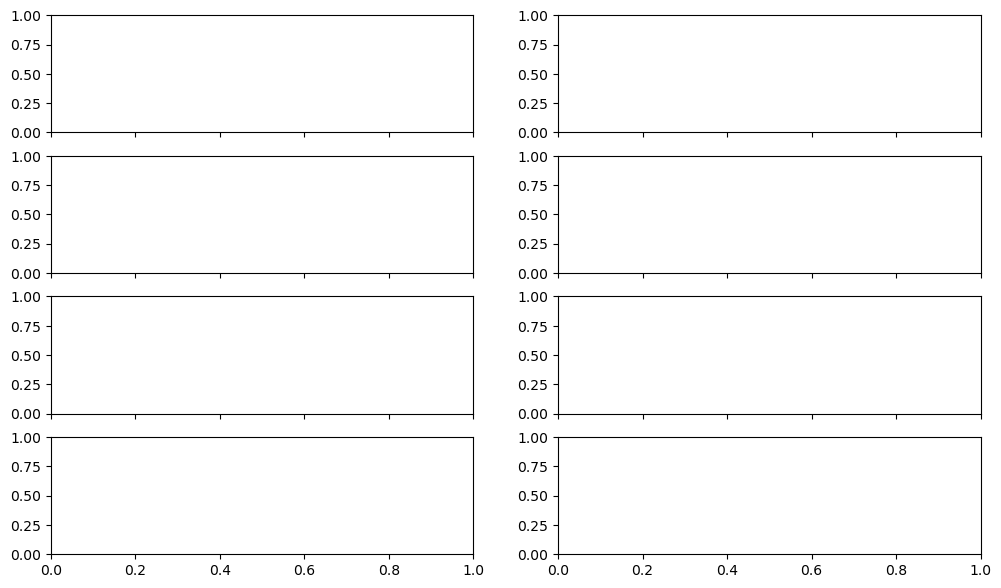

In [258]:
fig, axs = plt.subplots(4,2, sharex=True, figsize=(12, 7))
lines, labels = [], []

# rename 'Solid Ice discharge' as 'Solid Ice discharge (weighted mean)'


for i, basin in enumerate(dict_sections.values()):
    ax = axs[:].flatten()[i]
    df_single_sector = dsSectorSeasonalCycle.sel(time=slice(start_year, end_year)).groupby('time.month').mean().sel(Basins=basin).to_dataframe().drop(columns='Basins').drop(columns='Solid Ice discharge (weighted mean)')
    # add standard deviation as shading
    df_single_sector_std = dsSectorSeasonalCycle.sel(time=slice(start_year, end_year)).groupby('time.month').std().sel(Basins=basin).to_dataframe().drop(columns='Basins').drop(columns='Solid Ice discharge (weighted mean)')

    df_single_sector2003_2012 = dsSectorSeasonalCycle1990_2000.sel(Basins=basin).to_dataframe().drop(columns='Basins').drop(columns='Solid Ice discharge (weighted mean)')
    df_single_sector2003_2012.plot(kind='line',  ax=ax,  legend=False,  color=[dict_colors_FW[var] for var in df_single_sector.columns], linestyle='--')
    df_single_sector.plot(kind='line',  ax=ax,  legend=False,  color=[dict_colors_FW[var] for var in df_single_sector.columns])

    for var in df_single_sector.columns:
        ax.fill_between(df_single_sector.index, df_single_sector[var] - df_single_sector_std[var], df_single_sector[var] + df_single_sector_std[var], alpha=0.1,  color=[dict_colors_FW[var] for var in df_single_sector.columns])
    ax.title.set_text(basin)
    # ax.set_xlim([1, 12])
    # ax.set_xticks(np.arange(1, 13))


    # # rightrow
    # ax_right = axs[:,1].flatten()[i]
    # df_single_sector_change = df_single_sector-df_single_sector2003_2012
    # df_single_sector_change.plot(kind='bar',  ax=ax_right,  legend=False,  color=[dict_colors_FW[var] for var in df_single_sector_change.columns])

# ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
fig.suptitle(f"Seasonal cycle of freshwater for each basin {start_year}-{end_year}")
plt.tight_layout()

In [ ]:
axs[::2, 0].flatten()

array([<Axes: title={'center': 'SE'}, xlabel='month'>,
       <Axes: title={'center': 'CE'}, xlabel='month'>,
       <Axes: title={'center': 'NE'}, xlabel='month'>,
       <Axes: title={'center': 'NO'}, xlabel='month'>], dtype=object)

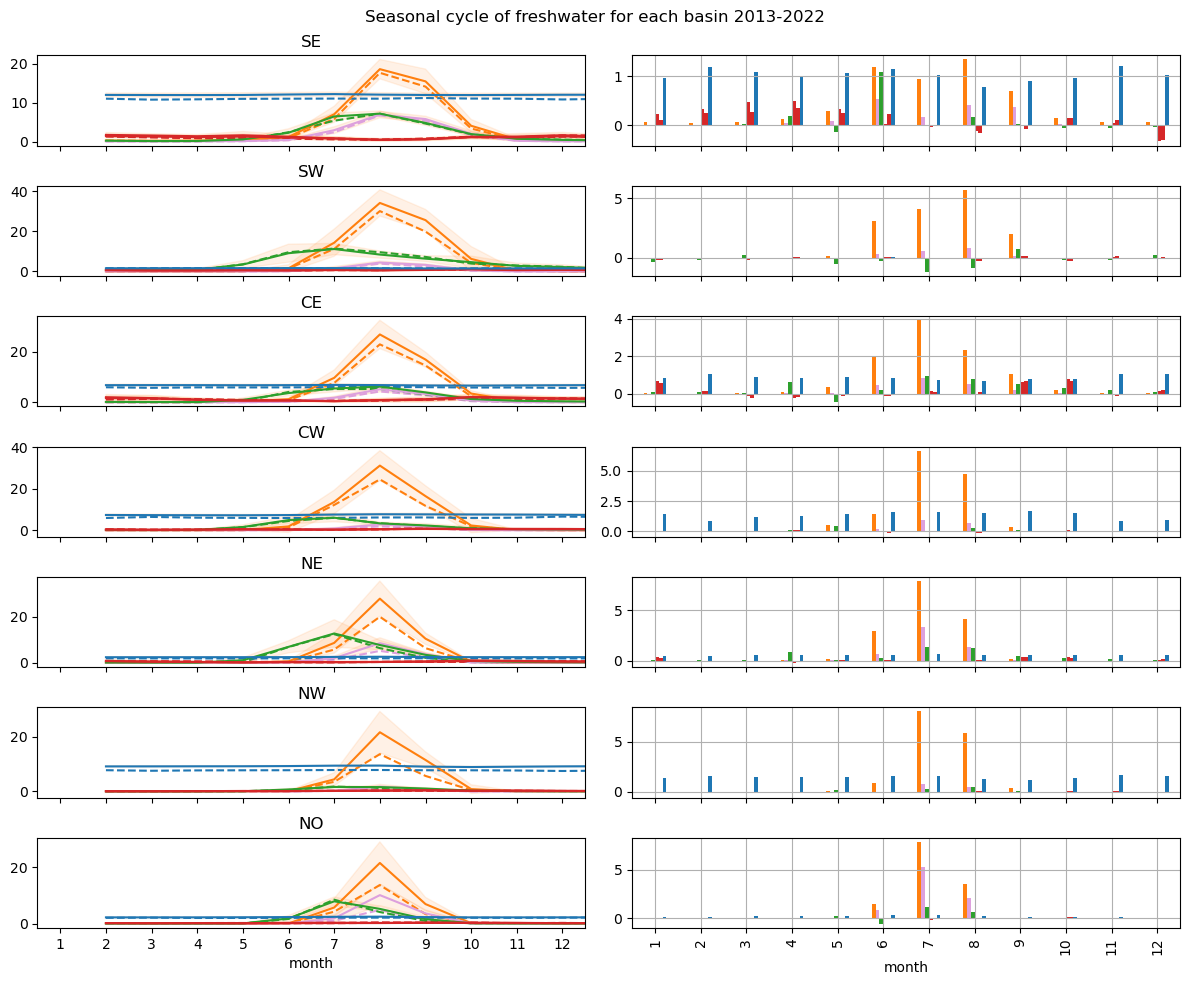

In [ ]:
fig, axs = plt.subplots(7,2, sharex=True, figsize=(12, 10))
lines, labels = [], []

# rename 'Solid Ice discharge' as 'Solid Ice discharge (weighted mean)'


for i, basin in enumerate(dict_sections.values()):
    ax = axs[:,0].flatten()[i]
    df_single_sector = dsSectorSeasonalCycle.sel(time=slice(start_year, end_year)).groupby('time.month').mean().sel(Basins=basin).to_dataframe().drop(columns='Basins').drop(columns='Solid Ice discharge (weighted mean)')
    # add standard deviation as shading
    df_single_sector_std = dsSectorSeasonalCycle.sel(time=slice(start_year, end_year)).groupby('time.month').std().sel(Basins=basin).to_dataframe().drop(columns='Basins').drop(columns='Solid Ice discharge (weighted mean)')

    df_single_sector2003_2012 = dsSectorSeasonalCycle1990_2000.sel(Basins=basin).to_dataframe().drop(columns='Basins').drop(columns='Solid Ice discharge (weighted mean)')
    df_single_sector2003_2012.plot(kind='line',  ax=ax,  legend=False,  color=[dict_colors_FW[var] for var in df_single_sector.columns], linestyle='--')
    df_single_sector.plot(kind='line',  ax=ax,  legend=False,  color=[dict_colors_FW[var] for var in df_single_sector.columns])

    for var in df_single_sector.columns:
        ax.fill_between(df_single_sector.index, df_single_sector[var] - df_single_sector_std[var], df_single_sector[var] + df_single_sector_std[var], alpha=0.1,  color=[dict_colors_FW[var] for var in df_single_sector.columns])
    ax.title.set_text(basin)
    # ax.set_xlim([1, 12])
    # ax.set_xticks(np.arange(1, 13))


    # rightrow
    ax_right = axs[:,1].flatten()[i]
    df_single_sector_change = df_single_sector-df_single_sector2003_2012
    df_single_sector_change.plot(kind='bar',  ax=ax_right,  legend=False,  color=[dict_colors_FW[var] for var in df_single_sector_change.columns])
    ax_right.grid()

# ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
fig.suptitle(f"Seasonal cycle of freshwater for each basin {start_year}-{end_year}")
plt.tight_layout()

In [ ]:
(df_single_sector[FW_sources_racm].T/df_single_sector[FW_sources_racm].sum(axis=1)).T

Liquid Runoff Ice Sheet  Liquid Runoff Ice Caps  Liquid Runoff Tundra  \
month                                                                          
1                     0.000628                0.000396              0.000380   
2                     0.000516                0.000344              0.000436   
3                     0.000564                0.000370              0.000294   
4                     0.001210                0.000729              0.010497   
5                     0.005023                0.004365              0.415554   
6                     0.314395                0.102462              0.435956   
7                     0.545724                0.255801              0.131744   
8                     0.471290                0.244991              0.105867   
9                     0.041908                0.014481              0.037790   
10                    0.001036                0.001091              0.016283   
11                    0.000769                0.000452              0.002099   
12                    0.000685                0.000434              0.000499   

       Precipitation Fjords  Solid Ice Discharge  
month                                             
1                  0.066320             0.932275  
2                  0.044893             0.953810  
3                  0.056917             0.941855  
4                  0.047559             0.940004  
5                  0.051603             0.523456  
6                  0.015735             0.131451  
7                  0.005152             0.061579  
8                  0.022317             0.155534  
9                  0.096800             0.809021  
10                 0.092187             0.889402  
11                 0.053989             0.942691  
12                 0.060751             0.937631

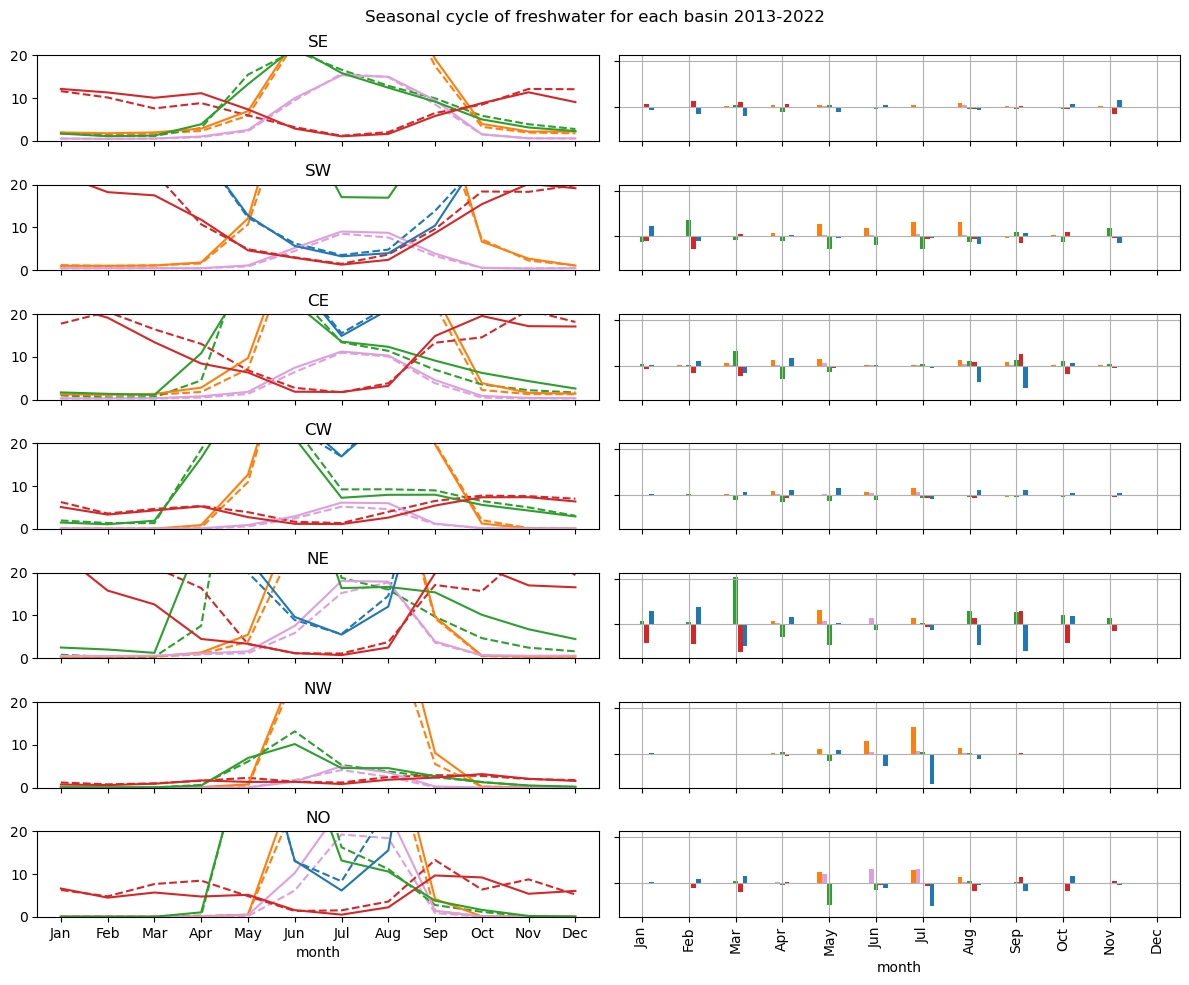

In [ ]:
fig, axs = plt.subplots(7,2, sharex=True, figsize=(12, 10), sharey='col')
lines, labels = [], []

FW_sources_racm = ['Liquid Runoff Ice Sheet', 'Liquid Runoff Ice Caps',
       'Liquid Runoff Tundra', 'Precipitation Fjords',
        'Solid Ice Discharge']
# rename 'Solid Ice discharge' as 'Solid Ice discharge (weighted mean)'

def percentage(df):
    return (df.T/df.sum(axis=1)).T *100

for i, basin in enumerate(dict_sections.values()):
    ax = axs[:,0].flatten()[i]
    df_single_sector = dsSectorSeasonalCycle.sel(time=slice(start_year, end_year)).groupby('time.month').mean().sel(Basins=basin).to_dataframe().drop(columns='Basins').drop(columns='Solid Ice discharge (weighted mean)')
    df_single_sector = percentage(df_single_sector[FW_sources_racm])   

    # add standard deviation as shading
    df_single_sector_std = dsSectorSeasonalCycle.sel(time=slice(start_year, end_year)).groupby('time.month').std().sel(Basins=basin).to_dataframe().drop(columns='Basins').drop(columns='Solid Ice discharge (weighted mean)')

    df_single_sector_early= dsSectorSeasonalCycle1990_2000.sel(Basins=basin).to_dataframe().drop(columns='Basins').drop(columns='Solid Ice discharge (weighted mean)')
    df_single_sector_early = percentage(df_single_sector_early[FW_sources_racm])
    df_single_sector_early.plot(kind='line',  ax=ax,  legend=False,  color=[dict_colors_FW[var] for var in df_single_sector.columns], linestyle='--')
    df_single_sector.plot(kind='line',  ax=ax,  legend=False,  color=[dict_colors_FW[var] for var in df_single_sector.columns])

    ax.title.set_text(basin)


    # rightrow
    ax_right = axs[:,1].flatten()[i]
    df_single_sector_change = df_single_sector-df_single_sector_early
    df_single_sector_change.plot(kind='bar',  ax=ax_right,  legend=False,  color=[dict_colors_FW[var] for var in df_single_sector_change.columns])
    ax_right.grid()

axs[0,-1].set_xlim([0.5, 12.5])
ax.set_ylim([0, 20])
ax.set_xticks(ticks = np.arange(1, 13), labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
fig.suptitle(f"Seasonal cycle of freshwater for each basin {start_year}-{end_year}")
plt.tight_layout()

In [ ]:
fig, axs = plt.subplots(4,2, sharex=True, figsize=(12, 7))
fig.delaxes(axs.flatten()[7])

lines, labels = [], []

# rename 'Solid Ice discharge' as 'Solid Ice discharge (weighted mean)'


for i, basin in enumerate(dfRunoffIceSector.columns):
    ax = axs.flatten()[i]
    df_single_sector = dsSectorSeasonalCycle.sel(time=slice(start_year, end_year)).groupby('time.month').mean().sel(Basins=basin).to_dataframe().drop(columns='Basins').drop(columns='Solid Ice discharge (weighted mean)')
    # add standard deviation as shading
    df_single_sector_std = dsSectorSeasonalCycle.sel(time=slice(start_year, end_year)).groupby('time.month').std().sel(Basins=basin).to_dataframe().drop(columns='Basins').drop(columns='Solid Ice discharge (weighted mean)')

    df_single_sector.plot(kind='line',  ax=ax,  legend=False,  color=[dict_colors_FW[var] for var in df_single_sector.columns])
    for var in df_single_sector.columns:
        ax.fill_between(df_single_sector.index, df_single_sector[var] - df_single_sector_std[var], df_single_sector[var] + df_single_sector_std[var], alpha=0.1,  color=[dict_colors_FW[var] for var in data_mean_perc.columns])
    ax.title.set_text(basin)
    ax.set_xlim([1, 12])
    ax.set_xticks(np.arange(1, 13))
ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
fig.suptitle(f"Seasonal cycle of freshwater for each basin {start_year}-{end_year}")

# Relative plot per month - incl. csv

In [76]:
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_names_id = dict(zip(np.arange(1, 13), month_names))

In [77]:
csv_seasonal_sector = "/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/PhD Anneke Vries - General/freshwaterII/data/processed/Seasonal cycle per sector"

------> NO
Solid Ice Discharge: 95% in Feb
Liquid Runoff Ice Sheet: 55% in Jul
Liquid Runoff Tundra: 44% in Jun
Liquid Runoff Ice Caps: 26% in Jul
Precipitation Fjords: 10% in Sep
------> NW
Solid Ice Discharge: 99% in Feb
Liquid Runoff Ice Sheet: 62% in Jul
Liquid Runoff Tundra: 10% in Jun
Liquid Runoff Ice Caps: 5% in Jul
Precipitation Fjords: 3% in Oct
------> NE
Solid Ice Discharge: 85% in Mar
Liquid Runoff Ice Sheet: 59% in Jul
Liquid Runoff Tundra: 66% in May
Liquid Runoff Ice Caps: 18% in Jul
Precipitation Fjords: 25% in Jan
------> CW
Solid Ice Discharge: 95% in Feb
Liquid Runoff Ice Sheet: 69% in Jul
Liquid Runoff Tundra: 34% in May
Liquid Runoff Ice Caps: 6% in Jul
Precipitation Fjords: 7% in Nov
------> CE
Solid Ice Discharge: 84% in Mar
Liquid Runoff Ice Sheet: 59% in Jul
Liquid Runoff Tundra: 29% in May
Liquid Runoff Ice Caps: 11% in Jul
Precipitation Fjords: 22% in Jan
------> SW
Solid Ice Discharge: 56% in Feb
Liquid Runoff Ice Sheet: 69% in Jul
Liquid Runoff Tundra: 69%

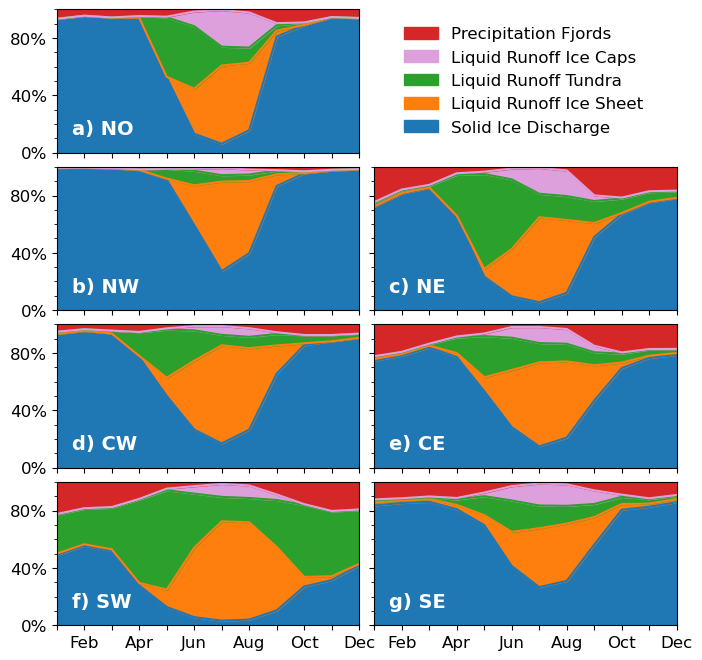

In [114]:
 
 
 col_order_rel_sector = ['Solid Ice Discharge', 'Liquid Runoff Ice Sheet','Liquid Runoff Tundra',  'Liquid Runoff Ice Caps', 'Precipitation Fjords']


pd.options.plotting.backend = "matplotlib"
import warnings
warnings.filterwarnings('ignore')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
yticks = np.linspace(0,1,6, endpoint=True)
minor_yticks = np.linspace(0,1,11, endpoint=True)
yticklabels = [f'{ytick:.0%}' if i%1==0 else " " for i, ytick in enumerate(yticks)]
# rename 'Solid Ice discharge' as 'Solid Ice discharge (weighted mean)'
plt.style.use('default')

basin_list_8sub = ['NO','', 'NW', 'NE', 'CW', 'CE', 'SW', 'SE']
basin_alphabet = ['a', '', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
fig, axs = plt.subplots(4,2, sharex=True, figsize=(8, 8), sharey=True)

# extend 'Solid Ice discharge' with 'Solid Ice discharge'
for i, basin in enumerate(basin_list_8sub):
    ax = axs.flatten()[i]
    if basin == '':
        fig.delaxes(axs.flatten()[i])
        continue
    df_single_sector = dsSectorSeasonalCycle[col_order_rel_sector].sel(time=slice(start_year, end_year)).groupby('time.month').mean().sel(Basins=basin).to_dataframe().drop(columns='Basins')
    # add standard deviation as shading
    df_sector_seasonal_relative = (df_single_sector.T/df_single_sector.sum(axis=1)).T
    (df_sector_seasonal_relative*100).to_csv(f"{csv_seasonal_sector}/{basin}_Seasonal.csv")

    print("------> " + basin)
    for fw in df_sector_seasonal_relative.columns:
        print (f"{fw}: { df_sector_seasonal_relative[fw].max():.0%} in {month_names_id[df_sector_seasonal_relative[fw].idxmax()]}")

    df_sector_seasonal_relative.plot(kind='area',  ax=ax,  legend=False, color=[dict_colors_FW[var] for var in df_single_sector.columns], stacked=True)
    # for var in df_single_sector.columns:
    #     ax.fill_between(df_single_sector.index, df_single_sector[var] - df_single_sector_std[var], df_single_sector[var] + df_single_sector_std[var], alpha=0.1, color='Solid Ice discharge'[var])
    ax.set_xlim([1, 12])
    months = [month if i%2== 1 else " " for i, month in enumerate(months)]
    ax.set_xticks(np.arange(1, 12+1),months, fontsize=12)
    # ax.set_xticks(np.arange(1, len(months)+1),months, fontsize=12, minor=True)

    ax.set_yticks(yticks[:-1:2], yticklabels[:-1:2], fontsize=12)
    ax.set_yticks(minor_yticks, minor=True)
    ax.set_ylim([0, 1]  )
    ax.set_xlabel('')
    ax.text(0.05, 0.1, f"{basin_alphabet[i]}) {basin}", fontsize=14, ha='left', va='bottom', transform=ax.transAxes, color ='white', weight='bold')
    # fig.savefig(pathFigures + f"Seasonal_mean/per_sector/Seasonal_cycle_{basin}.png", bbox_inches='tight', transparent=True)
handles, labels = axs.flatten()[0].get_legend_handles_labels()
axs.flatten()[0].legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.1, 0.5), loc='center left', frameon=False, fontsize=12)
plt.subplots_adjust(wspace=0.05, hspace=0.1)
# plt.tight_layout()
plt.show()

------> SE
Solid Ice Discharge: 86% in Mar
Liquid Runoff Ice Sheet: 41% in Jul
Liquid Runoff Tundra: 22% in Jun
Liquid Runoff Ice Caps: 15% in Jul
Precipitation Fjords: 12% in Jan


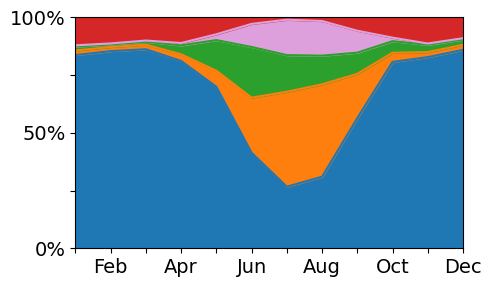

------> SW
Solid Ice Discharge: 56% in Feb
Liquid Runoff Ice Sheet: 69% in Jul
Liquid Runoff Tundra: 69% in May
Liquid Runoff Ice Caps: 9% in Jul
Precipitation Fjords: 22% in Jan


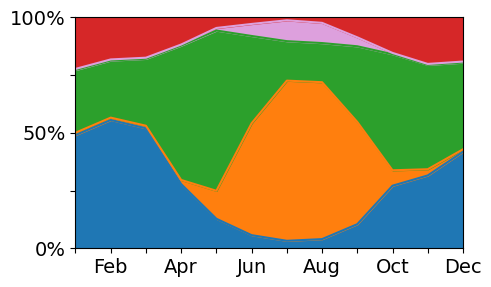

------> CE
Solid Ice Discharge: 84% in Mar
Liquid Runoff Ice Sheet: 59% in Jul
Liquid Runoff Tundra: 29% in May
Liquid Runoff Ice Caps: 11% in Jul
Precipitation Fjords: 22% in Jan


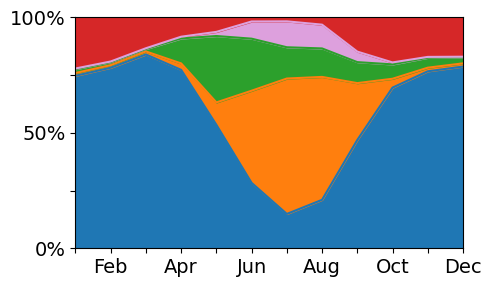

------> CW
Solid Ice Discharge: 95% in Feb
Liquid Runoff Ice Sheet: 69% in Jul
Liquid Runoff Tundra: 34% in May
Liquid Runoff Ice Caps: 6% in Jul
Precipitation Fjords: 7% in Nov


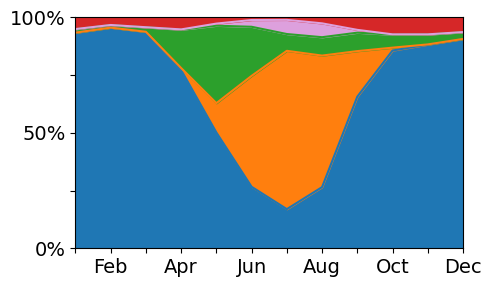

------> NE
Solid Ice Discharge: 85% in Mar
Liquid Runoff Ice Sheet: 59% in Jul
Liquid Runoff Tundra: 66% in May
Liquid Runoff Ice Caps: 18% in Jul
Precipitation Fjords: 25% in Jan


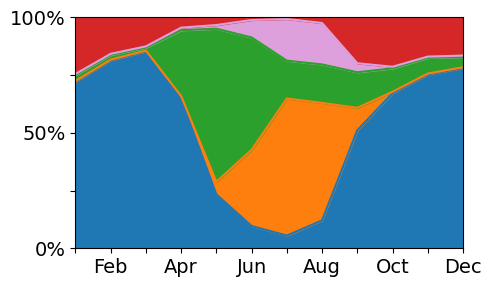

------> NW
Solid Ice Discharge: 99% in Feb
Liquid Runoff Ice Sheet: 62% in Jul
Liquid Runoff Tundra: 10% in Jun
Liquid Runoff Ice Caps: 5% in Jul
Precipitation Fjords: 3% in Oct


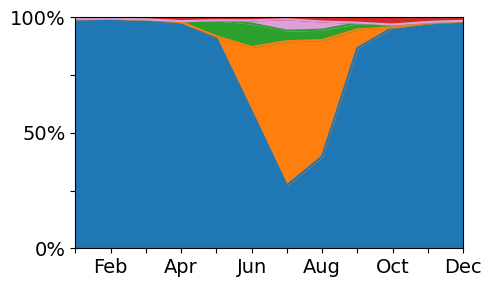

------> NO
Solid Ice Discharge: 95% in Feb
Liquid Runoff Ice Sheet: 55% in Jul
Liquid Runoff Tundra: 44% in Jun
Liquid Runoff Ice Caps: 26% in Jul
Precipitation Fjords: 10% in Sep


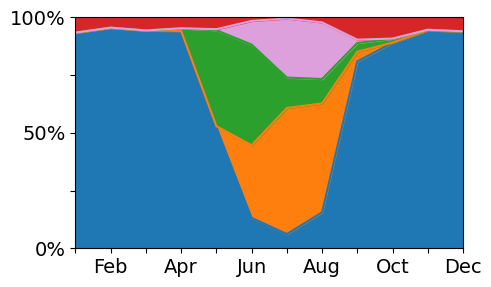

In [78]:
col_order_rel_sector = ['Solid Ice Discharge', 'Liquid Runoff Ice Sheet','Liquid Runoff Tundra',  'Liquid Runoff Ice Caps', 'Precipitation Fjords']


pd.options.plotting.backend = "matplotlib"
import warnings
warnings.filterwarnings('ignore')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
yticks = np.linspace(0,1,5, endpoint=True)
yticklabels = [f'{ytick:.0%}' if i%2==0 else " " for i, ytick in enumerate(yticks)]
# rename 'Solid Ice discharge' as 'Solid Ice discharge (weighted mean)'
plt.style.use('default')
for i, basin in enumerate(dfRunoffIceSector.columns):
    fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    df_single_sector = dsSectorSeasonalCycle[col_order_rel_sector].sel(time=slice(start_year, end_year)).groupby('time.month').mean().sel(Basins=basin).to_dataframe().drop(columns='Basins')
    # add standard deviation as shading
    df_sector_seasonal_relative = (df_single_sector.T/df_single_sector.sum(axis=1)).T
    (df_sector_seasonal_relative*100).to_csv(f"{csv_seasonal_sector}/{basin}_Seasonal.csv")

    print("------> " + basin)
    for fw in df_sector_seasonal_relative.columns:
        print (f"{fw}: { df_sector_seasonal_relative[fw].max():.0%} in {month_names_id[df_sector_seasonal_relative[fw].idxmax()]}")

    df_sector_seasonal_relative.plot(kind='area',  ax=ax,  legend=False, color=[dict_colors_FW[var] for var in df_single_sector.columns], stacked=True)
    # for var in df_single_sector.columns:
    #     ax.fill_between(df_single_sector.index, df_single_sector[var] - df_single_sector_std[var], df_single_sector[var] + df_single_sector_std[var], alpha=0.1, color='Solid Ice discharge'[var])
    ax.set_xlim([1, 12])
    months = [month if i%2== 1 else " " for i, month in enumerate(months)]
    ax.set_xticks(np.arange(1, 13, ),months, fontsize=14)
    ax.set_ylim([0, 1]  )
    ax.set_yticks(yticks, yticklabels, fontsize=14)
    ax.set_xlabel('')
    # set template
    # fig.savefig(pathFigures + f"Seasonal_mean/per_sector/Seasonal_cycle_{basin}.png", bbox_inches='tight', transparent=True)
    plt.show()

In [ ]:
fig = px.line(dfRegionD, x=dfRegionD.index, y=dfRegionD.columns, title="Monthly solid discharge per region", markers=True)
# template white
template = "plotly_white"
fig.update_layout(template=template)
# update x-axis
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="Solid discharge (Gt/month)")


In [257]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Get the 'tab10' colormap
cmap = plt.get_cmap('tab10')

# Get the RGB values of the colors in the colormap
rgb_values = [mcolors.to_rgb(cmap(i)) for i in range(cmap.N)]

# Create the dictionary
dict_colors_FW_rgb = {
    'Liquid Runoff Ice Sheet': rgb_values[1],
    'Liquid Runoff Ice Caps': rgb_values[4],
    'Liquid Runoff Tundra': rgb_values[2],
    'Precipitation Fjords': rgb_values[3],
    'Solid Ice discharge (weighted mean)': rgb_values[0],
    'Solid Ice Discharge': rgb_values[0],
    'Solid Ice discharge': rgb_values[0]

}


In [245]:
df_sector_all = dsSectorSeasonalCycle[col_order_rel_sector].sel(time=slice(start_year, end_year)).groupby('time.month').mean().to_dataframe()
df_sector_seasonal_relative = (df_sector_all.T/df_sector_all.sum(axis=1)).T
df_sector_seasonal_relative_per_sector = df_sector_seasonal_relative.stack().reset_index().rename(columns={'level_2':'Source', 0:'%'})
df_sector_seasonal_relative_per_sector["%"] = (df_sector_seasonal_relative_per_sector["%"] * 100).round(1)

In [261]:
dict_colors_FW = dict(zip(data_varsFW, colors_FW))
dict_colors_FW['Solid Ice Discharge'] = 'tab:blue'

In [350]:
import plotly.graph_objects as go
import plotly.io as pio




# replace Solid_iCE discharge with Solid Ice discharge (weighted mean)
# df_sector_windrose['Source'] = df_sector_windrose['Source'].replace('Solid Ice discharge (weighted mean)', 'Solid Ice Discharge')
for basin in ['NO', 'NE', 'CE', 'SE', 'SW', 'CW', 'NW']:
    fig = go.Figure()

    df_sector_windrose = df_sector_seasonal_relative_per_sector[df_sector_seasonal_relative_per_sector['Basins'] == basin]
    for source in df_sector_windrose['Source'].unique():
        df_source = df_sector_windrose[df_sector_windrose['Source'] == source]
        fig.add_trace(go.Barpolar(
            r=df_source['%'].values,
            name=f"{basin} {source}",
            marker_color=f'rgb{dict_colors_FW_rgb[source]}',
        ))

    fig.update_traces(text=month_names)
    # fig.update_traces(text=['North', 'N-E', 'East', 'S-E', 'South', 'S-W', 'West', 'N-W'])
    fig.update_layout(
        font_size=16,
        polar_radialaxis_ticksuffix='%',
        polar_radialaxis_tickvals=[0, 20, 40, 60, 80, 100],
        polar_radialaxis_ticktext=['', '', '', '', '', ''],
        showlegend=False, 
        legend_font_size=16,
        polar_angularaxis_direction='clockwise',
        polar_angularaxis_rotation=90,
        template="plotly_white",
        polar_angularaxis_tickvals=np.arange(0,360,30),
        polar_angularaxis_ticktext=month_names,
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)', 
        width =400,
        height =400)
    # fig.write_image(pathFigures + f"Windrose_{basin}.png", width=800, height=800, scale=2)

    fig.show()

In [351]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Get the 'tab10' colormap
cmap = plt.get_cmap('tab10')

# Get the RGB values of the colors in the colormap
rgb_values = [mcolors.to_rgb(cmap(i)) for i in range(cmap.N)]

# Print the RGB values
for i, rgb in enumerate(rgb_values):
    print(f"Color {i}: {rgb}")

Color 0: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
Color 1: (1.0, 0.4980392156862745, 0.054901960784313725)
Color 2: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)
Color 3: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)
Color 4: (0.5803921568627451, 0.403921568627451, 0.7411764705882353)
Color 5: (0.5490196078431373, 0.33725490196078434, 0.29411764705882354)
Color 6: (0.8901960784313725, 0.4666666666666667, 0.7607843137254902)
Color 7: (0.4980392156862745, 0.4980392156862745, 0.4980392156862745)
Color 8: (0.7372549019607844, 0.7411764705882353, 0.13333333333333333)
Color 9: (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)


### Per sector timeseries

In [363]:
dsSectorTimeseriesYY[var].sel(Basins=basin)

<xarray.DataArray 'Precipitation Fjords CARRA' (time: 85)> Size: 680B
array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
       1.75880335, 1.25067656, 2.01071043, 1.7400006 , 2.13948538,
       1.61264421, 1.68402171, 1.70650616, 1.40400188, 1.69336501,
       1.58992523, 1.6915425 , 1.4649318 , 1.9728678 , 1.68495645])
Coordinates:
    Basins   <U2 8B 'NO'
  * time     (time) datetime64[ns] 680B 1939-01-01 1940-01-01 ... 2023-01-01

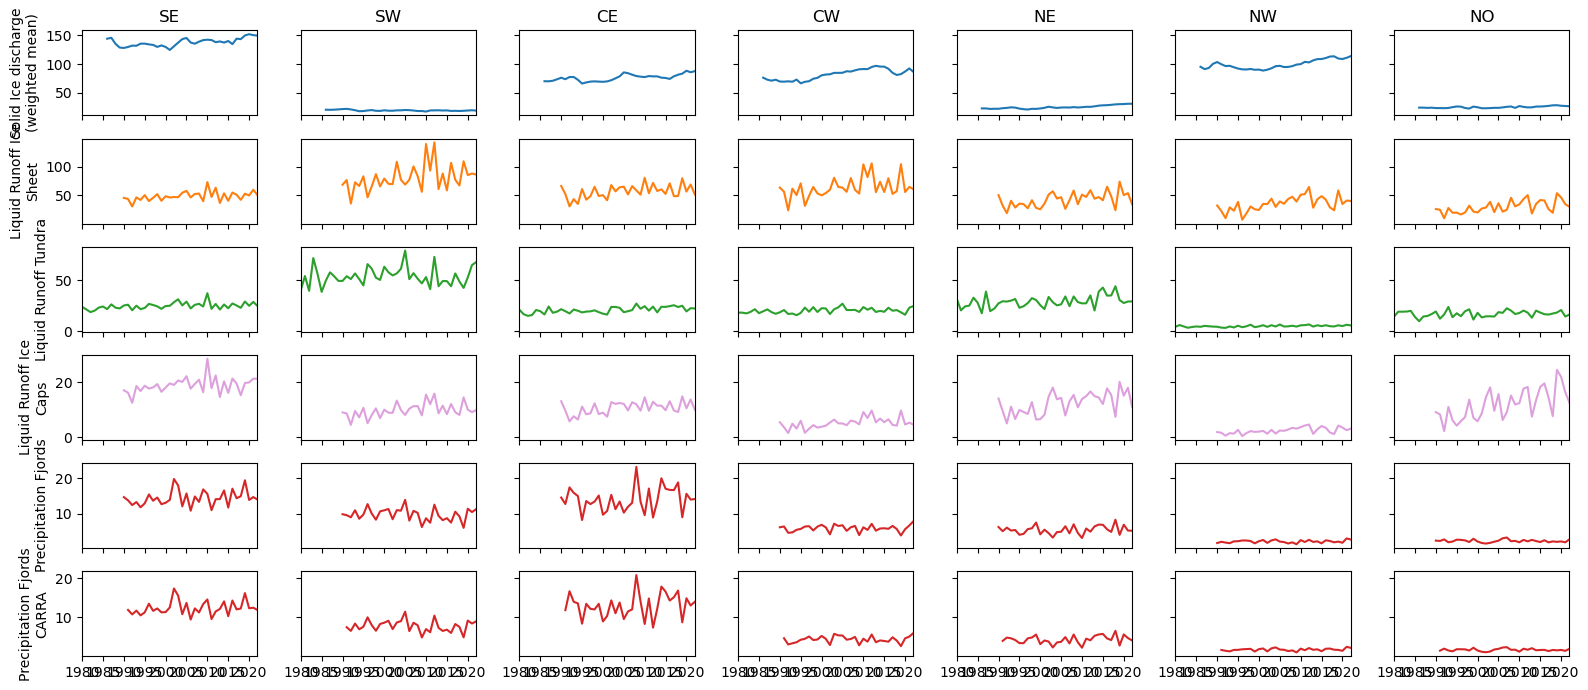

In [527]:
import textwrap

# if sector sum not in locals, read 
if not 'dsSectorSum' in locals():
    dsSectorSum = xr.open_dataset(pathDataTemp + "RACMO2.3p2_1k_sector_sum_2024_06_12.nc")


# dsSectorTimeseriesYY = (dsSectorSum.resample(time='YS').mean()*12).sel(time=slice('1980', '2022'))

# fig, axs = plt.subplots(6, 7, figsize=(16, 7), sharex=True, sharey='row')

# for j, basin in enumerate(dfRunoffIceSector.columns):
#     axs[0,j].set_title(basin)
#     for i, var in enumerate(dsSectorTimeseries.data_vars):
#         axs[i, j].plot(pd.to_datetime(dsSectorTimeseriesYY.time),dsSectorTimeseriesYY[var].sel(Basins=basin).values, label=f"{var}\n{basin}", color=dict_colors_FW[var])
#         wrapped_label = textwrap.fill(var, 20)  # Wrap text after 10 characters
#         axs[i, 0].set_ylabel(wrapped_label)
#     # format xticks conciseformatter
#     axs[-1, j].xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
#     axs[-1, j].set_xlim([pd.to_datetime("1980"), pd.to_datetime("2022")])

# plt.tight_layout()



In [630]:
# Convert the colors to RGB format and store them in the new dictionary
dict_colors_FW_rgb = {}
for source, color in dict_colors_FW.items():
    rgb = mcolors.to_rgb(color)
    dict_colors_FW_rgb[source] = rgb
# Convert the RGB values to CSS color format and store them in a new dictionary
dict_colors_FW_css = {}
for source, rgb in dict_colors_FW_rgb.items():
    css_color = mcolors.rgb2hex(rgb)
    dict_colors_FW_css[source] = css_color

print(dict_colors_FW_rgb)

{'Liquid Runoff Ice Sheet': (1.0, 0.4980392156862745, 0.054901960784313725), 'Liquid Runoff Ice Caps': (0.8666666666666667, 0.6274509803921569, 0.8666666666666667), 'Liquid Runoff Tundra': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), 'Precipitation Fjords': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), 'Solid Ice discharge (weighted mean)': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), 'Solid Ice Discharge': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), 'Precipitation Fjords CARRA': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)}


['rgba(31, 119, 180, 1)',
 'rgba(255, 127, 14, 1)',
 'rgba(44, 160, 44, 1)',
 'rgba(221, 160, 221, 1)',
 'rgba(214, 39, 40, 1)',
 'rgba(214, 39, 40, 1)']

In [614]:
# import pandas as pd
# import xarray as xr
# import plotly.express as px

# # Check if dsSectorSum is in locals, if not read it
# if 'dsSectorSum' not in locals():
#     dsSectorSum = xr.open_dataset(pathDataTemp + "RACMO2.3p2_1k_sector_sum_2024_06_12.nc")

# col_order_yearly= ['Solid Ice Discharge', 'Liquid Runoff Ice Sheet', 'Liquid Runoff Tundra', 'Liquid Runoff Ice Caps', 'Precipitation Fjords', 'Precipitation Fjords CARRA']
# colors = ['blue', 'orange', 'green', 'purple', 'red', 'red']
# # Include VFIRS variable in the dataset processing
# dfSectorTimeseriesYY = (
#     dsSectorSum.rename_vars({'Solid Ice discharge (weighted mean)': 'Solid Ice Discharge'})[col_order_abs]
#     .resample(time='YS').mean() * 12
# ).sel(time=slice('1980', '2022')).to_dataframe().stack().reset_index().rename(columns={'level_2': 'Source', 0: 'Gt'})
# # Include VFIRS variable in the dataset processing

# # colors = ["rgba({}, {}, {}, {})".format(int(r*255), int(g*255), int(b*255), alpha) for r, g, b in [dict_colors_FW_rgb[var] for var in col_order_abs]]


# pd.options.plotting.backend = "plotly"

# # Colors for the plot
# colors = ["rgba({}, {}, {}, {})".format(int(r*255), int(g*255), int(b*255), alpha) for r, g, b in [dict_colors_FW_rgb[var] for var in col_order_yearly]]

# # Plotly figure
# fig = px.line(dfSectorTimeseriesYY, x='time', y='Gt', color='Source', facet_col='Basins', facet_col_wrap=2,
#               facet_col_spacing=0.05, facet_row_spacing=0.03, title="Freshwater flux per source per basin",
#               template='plotly_white',
#              category_orders={'Basins': ['SW','SE', 'CW', 'CE', 'NW', 'NE',  'NO'][::-1]}
#              )

# for trace in fig.data:
#     if trace.name == 'Precipitation Fjords CARRA':
#         trace.line = dict(dash='dash', width=2, color='red')
# # Update layout
# fig.update_layout(
#     autosize=False, 
#     width=800, 
#     height=800, 
#     template='plotly_white',
#     legend=dict(
#         x=0.6,
#         y=0.02,
#         traceorder="normal",
#     )
# )
# # Update titles for each subplot

# alphabet = "gefcdab"
# for i, annotation in enumerate(fig['layout']['annotations']):
#     annotation.update(
#     text=f"{alphabet[i]} {annotation['text'].split('=')[1].strip()} ",
#     )


# fig.update_yaxes(matches=None, showticklabels=True)

# # fig.write_image(pathFigures + "Freshwater_flux_per_source_per_basin.png",)

# fig.show()




In [191]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter(df, x='gdpPercap', y='lifeExp', color='continent', size='pop',
                facet_col='year', facet_col_wrap=4)

fig.layout.yaxis.matches = 'y'
fig.layout.yaxis2.matches = 'y'
fig.layout.yaxis3.matches = 'y'
fig.layout.yaxis4.matches = 'y'

fig.layout.yaxis5.matches = 'y5'
fig.layout.yaxis7.matches = 'y5'
fig.layout.yaxis6.matches = 'y5'
fig.layout.yaxis8.matches = 'y5'

fig.layout.yaxis9.matches = 'y9'
fig.layout.yaxis10.matches = 'y9'
fig.layout.yaxis11.matches = 'y9'
fig.layout.yaxis12.matches = 'y9'

fig.show()

In [209]:
(dsSectorSum.resample(time='YS').mean()*12).sum(dim='Basins').to_dataframe().plot()

In [23]:
# dsSectorSum 
# add empty datavar


<xarray.Dataset> Size: 484kB
Dimensions:                              (time: 1408, Basins: 7)
Coordinates:
  * time                                 (time) datetime64[ns] 11kB 1939-09-1...
  * Basins                               (Basins) <U2 56B 'SE' 'SW' ... 'NO'
Data variables:
    Liquid Runoff Ice Sheet              (time, Basins) float32 39kB ...
    Liquid Runoff Ice Caps               (time, Basins) float32 39kB ...
    Liquid Runoff Tundra                 (time, Basins) float32 39kB ...
    Precipitation Fjords                 (time, Basins) float32 39kB ...
    Precipitation Fjords CARRA           (time, Basins) float64 79kB ...
    Solid Ice discharge (weighted mean)  (time, Basins) float64 79kB nan ... nan
    empty                                (time, Basins) float64 79kB nan ... nan
                                         (time, Basins) float64 79kB nan ... nan

In [3]:
import pandas as pd
import xarray as xr
import plotly.express as px

from scripts.open_preprocess_racmo import *
from scripts.paths import *
from scripts.dicts import *

# Check if dsSectorSum is in locals, if not read it
if 'dsSectorSum' not in locals():
    dsSectorSum = xr.open_dataset(pathDataTemp + "RACMO2.3p2_1k_sector_sum_2024_06_12.nc")

# Define the columns and colors
col_order_yearly = ['Solid Ice Discharge', 'Liquid Runoff Ice Sheet', 'Liquid Runoff Tundra', 'Liquid Runoff Ice Caps', 'Precipitation Fjords', 'Precipitation Fjords CARRA']
colors = ["rgba({}, {}, {}, {})".format(int(r*255), int(g*255), int(b*255), 1) for r, g, b in [dict_colors_FW_rgb[var] for var in col_order_yearly]]


# Include VFIRS variable in the dataset processing
dfSectorTimeseriesYY = (
    dsSectorSum.rename_vars({'Solid Ice discharge (weighted mean)': 'Solid Ice Discharge'})[col_order_yearly]
    .resample(time='YS').mean() * 12
).sel(time=slice('1990', '2022')).to_dataframe().stack().reset_index().rename(columns={'level_2': 'Source', 0: 'Gt'})

# Set plotting backend to Plotly
pd.options.plotting.backend = "plotly"

# add empty column in dfSectorTimeseriesYY
dfSectorTimeseriesYY['Basins'] = ' '

# Plotly figure with facet grid
fig = px.line(dfSectorTimeseriesYY, x='time', y='Gt', color='Source', facet_col='Basins',
              facet_col_spacing=0.05, facet_row_spacing=0.03, title="Freshwater flux per source per basin",
              facet_col_wrap=2, 
              template='plotly_white', color_discrete_sequence=colors,
              category_orders={'Source': col_order_yearly, 'Basins': ['SW','SE', 'CW', 'CE', 'NW', 'NE',  'NO'][::-1]}
             )

# Update traces with custom styling
for trace in fig.data:
    if trace.name == 'Precipitation Fjords CARRA':
        trace.line = dict(dash='dash', width=2, color='rgba(214, 39, 40, 1)')
    # if trace.name == 'Solid Ice Discharge':
    #     trace.line = dict(width=2, color='blue')

# Update layout
fig.update_layout(
    autosize=False,
    width=800, 
    height=800, 
    template='plotly_white',
    legend=dict(
        x=0.6,
        y=0.02,
        traceorder="normal"
    )
)
# fig.layout.yaxis.matches = 'y'
# fig.layout.yaxis2.matches = 'y'
# fig.layout.yaxis3.matches = 'y3'
# fig.layout.yaxis4.matches = 'y3'
# fig.layout.yaxis5.matches = 'y5'
# fig.layout.yaxis6.matches = 'y5'


alphabet = "gefcdab"



# # # Update annotations with alphabet labels 
# for i, annotation in enumerate(fig['layout']['annotations']):
#     annotation.update(
#         text=f"{alphabet[i]}) {annotation['text'].split('=')[1].strip()} ",
#     )

fig.update_yaxes(showticklabels=True, matches=None, rangemode="tozero")
# fig.write_image(pathFigures + "Freshwater_flux_per_source_per_basin.png")
fig.show()


Basins       time               Source          Gt
0           1990-01-01  Solid Ice Discharge  128.256393
5           1991-01-01  Solid Ice Discharge  129.934361
11          1992-01-01  Solid Ice Discharge  132.338225
17          1993-01-01  Solid Ice Discharge  132.069670
23          1994-01-01  Solid Ice Discharge  135.721360
...     ...        ...                  ...         ...
1349        2018-01-01  Solid Ice Discharge   28.171755
1355        2019-01-01  Solid Ice Discharge   28.378818
1361        2020-01-01  Solid Ice Discharge   27.434186
1367        2021-01-01  Solid Ice Discharge   27.024957
1373        2022-01-01  Solid Ice Discharge   26.602930

[231 rows x 4 columns]

In [33]:
#  copy dict_colors_FW into dict_linestyle_FW and make all lines solid, except for if it contains "CARRA", than dotted
dict_linestyle_FW = {'Liquid Runoff Ice Sheet': '-',
 'Liquid Runoff Ice Caps': '-',
 'Liquid Runoff Tundra': '-',
 'Precipitation Fjords': '-',
 'Solid Ice discharge (weighted mean)': '-',
 'Solid Ice Discharge': '-',
 'Precipitation Fjords CARRA': ':'}


------> NO
------> NW
------> NE
------> CW
------> CE
------> SW
------> SE


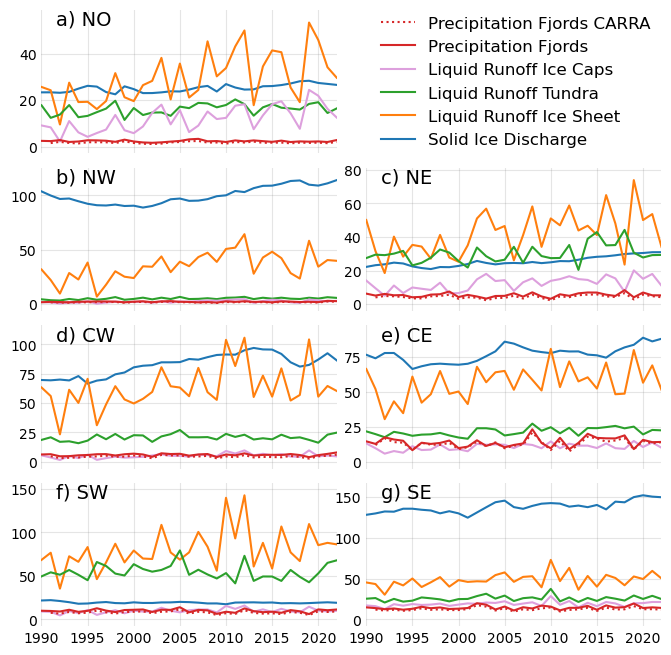

In [50]:
 
 
 col_order_rel_sector = ['Solid Ice Discharge', 'Liquid Runoff Ice Sheet','Liquid Runoff Tundra',  'Liquid Runoff Ice Caps', 'Precipitation Fjords']
pd.options.plotting.backend = "matplotlib"
import warnings
warnings.filterwarnings('ignore')
# rename 'Solid Ice discharge' as 'Solid Ice discharge (weighted mean)'
plt.style.use('default')

# Check if dsSectorSum is in locals, if not read it
if 'dsSectorSum' not in locals():
    dsSectorSum = xr.open_dataset(pathDataTemp + "RACMO2.3p2_1k_sector_sum_2024_06_12.nc")

basin_list_8sub = ['NO','', 'NW', 'NE', 'CW', 'CE', 'SW', 'SE']
basin_alphabet = ['a', '', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
fig, axs = plt.subplots(4,2, sharex=True, figsize=(8, 8), sharey=False)

# extend 'Solid Ice discharge' with 'Solid Ice discharge'
for i, basin in enumerate(basin_list_8sub):
    ax = axs.flatten()[i]
    if basin == '':
        fig.delaxes(axs.flatten()[i])
        continue
    df_single_sector =(dsSectorSum.rename_vars({'Solid Ice discharge (weighted mean)': 'Solid Ice Discharge'})[col_order_yearly].resample(time='YS').mean() * 12).sel(time=slice('1990', '2022')).sel(Basins=basin).to_dataframe().drop(columns='Basins')      

    print("------> " + basin)
    for var in df_single_sector.columns:
        linestyle = dict_linestyle_FW[var]
        df_single_sector[var].plot(kind='line', ax=ax, legend=False, color=dict_colors_FW[var], linestyle=linestyle)

    ax.grid(color = 'gray',alpha = 0.2)
    ymax = df_single_sector.max().max()*1.1
    ax.set_ylim([-ymax/20, ymax])  
    for side in  ['top', 'bottom', 'left', 'right']:
        ax.spines[side].set_visible(False)
    ax.set_xlabel('')
    # remove minor ticks
    ax.set_xticks(pd.date_range('1990', '2022', freq='5Y'), minor=False)
    # set minor ticks 
    ax.set_xticks(pd.date_range('1990', '2022', freq='5Y'), minor=True)
    ax.tick_params( length=0)  # Adjust major tick length as needed

    ax.text(0.05, 1, f"{basin_alphabet[i]}) {basin}", fontsize=14, ha='left', va='top', transform=ax.transAxes, color ='black')
handles, labels = axs.flatten()[0].get_legend_handles_labels()
axs.flatten()[0].legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.1, 0.5), loc='center left', frameon=False, fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
# plt.tight_layout()
plt.show()

In [656]:
import plotly.express as px
# if sector sum not in locals, read 
if not 'dsSectorSum' in locals():
    dsSectorSum = xr.open_dataset(pathDataTemp + "RACMO2.3p2_1k_sector_sum_2024_06_12.nc")

alpha = 1 # Adjust this value to change the transparency. 0 is fully transparent, 1 is fully opaque.
colors = ["rgba({}, {}, {}, {})".format(int(r*255), int(g*255), int(b*255), alpha) for r, g, b in [dict_colors_FW_rgb[var] for var in col_order_abs]]

dfSectorTimeserieMM = (dsSectorSum.rename_vars({'Solid Ice discharge (weighted mean)': 'Solid Ice Discharge'})[col_order_abs].resample(time='MS').mean()*12).sel(time=slice('2012', '2022')).to_dataframe().stack().reset_index().rename(columns={'level_2':'Source', 0:'Gt'})
fig = px.area(dfSectorTimeserieMM, x='time', y='Gt', color='Source', line_group='Basins', facet_col='Basins', facet_col_wrap=1, facet_col_spacing=0.04, facet_row_spacing=0.02,  color_discrete_sequence=colors,               category_orders={'Basins': ['SW','SE', 'CW', 'CE', 'NW', 'NE', 'NO'][::-1]})


fig.update_layout(
    autosize=False, 
    width=800, 
    height=800, 
    template='plotly_white',
    legend=dict(
        x=1,
        y=1,
        traceorder="reversed")
)

alphabet = "abcdefg"
alphabet = "gfedcba"
for i, annotation in enumerate(fig['layout']['annotations']):
    annotation.update(
    text=f"{alphabet[i]}) {annotation['text'].split('=')[1].strip()} ",
    )
fig.update_yaxes(matches=None, showticklabels=True)
fig.write_image(pathFigures + "Freshwater_flux_per_source_per_basin_monthly.png")
fig.show()


In [ ]:
dfSectorTimeserieMM.plot()

# Seasonal change

In [289]:
data_varsFW = list(dsSectorSum.data_vars)
data_varsFW

['Liquid Runoff Ice Sheet',
 'Liquid Runoff Ice Caps',
 'Liquid Runoff Tundra',
 'Precipitation Fjords',
 'Precipitation Fjords CARRA',
 'Solid Ice discharge (weighted mean)',
 'winter_year',
 'summer_year']

In [265]:
basinorderkarlsson = ["SW", "SE", "NW", "NO", "NE", "CW", "CE"][::-1]

In [282]:
dsSectorSum['winter_year'] = dsSectorSum.time.dt.year.where((dsSectorSum.time.dt.month <= 3) | (dsSectorSum.time.dt.month >= 10), np.nan)
dsSectorSum['winter_year'] = dsSectorSum['winter_year'].where(dsSectorSum.time.dt.month <= 3, dsSectorSum['winter_year'] + 1)
ds_winter_sum = dsSectorSum.groupby('winter_year').mean(skipna=True)
# multiply data_varsFW by 6
ds_winter_sum[data_varsFW] = ds_winter_sum[data_varsFW] * 6
df_winter_sum = ds_winter_sum.to_dataframe()
df_winter_sum["Winter Liquid"] = df_winter_sum["Liquid Runoff Ice Sheet"] + df_winter_sum["Liquid Runoff Ice Caps"] + df_winter_sum["Liquid Runoff Tundra"] + df_winter_sum["Precipitation Fjords"]
df_winter_sum["Winter Solid"] = df_winter_sum["Solid Ice discharge (weighted mean)"]

# Create a new coordinate 'year' for the summer year of each time point
dsSectorSum['summer_year'] = dsSectorSum.time.dt.year.where((dsSectorSum.time.dt.month >= 4) & (dsSectorSum.time.dt.month <= 9), np.nan)
ds_summer_sum = dsSectorSum.groupby('summer_year').mean(skipna=True)
ds_summer_sum[data_varsFW] = ds_summer_sum[data_varsFW] * 6.

ds_summer_sum["Summer Liquid"] = ds_summer_sum["Liquid Runoff Ice Sheet"] + ds_summer_sum["Liquid Runoff Ice Caps"] + ds_summer_sum["Liquid Runoff Tundra"] + ds_summer_sum["Precipitation Fjords"]
ds_summer_sum["Summer Solid"] = ds_summer_sum["Solid Ice discharge (weighted mean)"]
df_summer_sum =ds_summer_sum.to_dataframe()

dfSectorSeasonalSum = pd.concat([df_summer_sum["Summer Liquid"], df_summer_sum["Summer Solid"], df_winter_sum["Winter Liquid"], df_winter_sum["Winter Solid"]], axis=1)
dfSectorSeasonalSum.index.set_names(['Year', 'Basin'], inplace=True)
dfSectorSeasonalSum = dfSectorSeasonalSum.dropna()

In [284]:

dfSectorSeasonalSumdiff = ((dfSectorSeasonalSum['2012':'2022'].groupby('Basin').mean() - dfSectorSeasonalSum['2002':'2012'].groupby('Basin').mean())/dfSectorSeasonalSum['2002':'2012'].groupby('Basin').mean()*100).round(1).dropna()
# .to_csv(pathDataTemp+"/Sum_freshwater_per_sector/SeasonalChange.csv")

Text(0.5, 0.98, 'Seasonal mean change in freshwater per sector\n(2012-2022) - (2002-2012)')

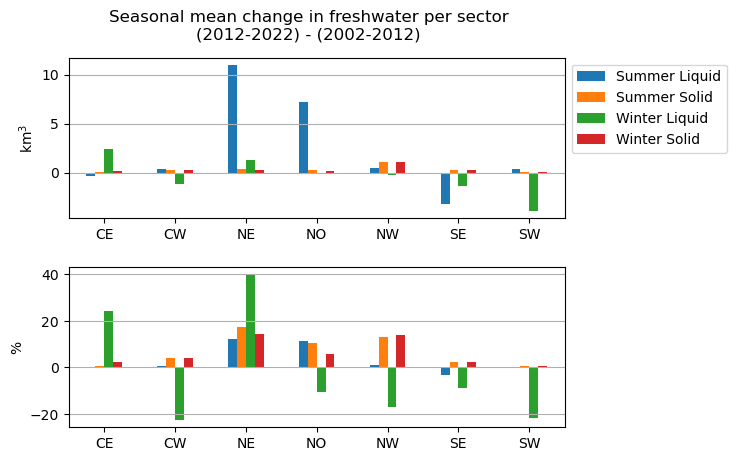

In [285]:
fig, (axKM, axPercent) = plt.subplots(2,1)

((dfSectorSeasonalSum['2012':'2022'].groupby('Basin').mean() - dfSectorSeasonalSum['2002':'2012'].groupby('Basin').mean())/dfSectorSeasonalSum['2002':'2012'].groupby('Basin').mean()*100).round(1).dropna().loc[basinorderkarlsson].plot(kind='bar', ax=axPercent,  legend=False, ylabel="%")
# horizontal grid

# drop not gris
(dfSectorSeasonalSum['2012':'2022'].groupby('Basin').mean() - dfSectorSeasonalSum['2002':'2012'].groupby('Basin').mean()).loc[basinorderkarlsson].plot(kind='bar', ax=axKM, ylabel=r"km$^3$",    legend=False)

axKM.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.subplots_adjust(hspace=0.3)
for ax in [axKM, axPercent]:
    ax.grid(axis='y')
    ax.set_xlabel('')
    # HORIZONTAL XTICKLABLES
    ax.xaxis.set_tick_params(rotation=0)

 
fig.suptitle("Seasonal mean change in freshwater per sector\n(2012-2022) - (2002-2012)")

exporting to excel

In [290]:
data_varsFW = [
'Liquid Runoff Ice Sheet',
 'Liquid Runoff Ice Caps',
 'Liquid Runoff Tundra',
 'Precipitation Fjords',
 'Solid Ice discharge (weighted mean)',]


dfSectorSeasonalFWcomp = pd.concat([df_summer_sum[data_varsFW], df_winter_sum[data_varsFW]], axis=1, keys = ['Summer', 'Winter'])

# combine column names
dfSectorSeasonalFWcomp.columns = dfSectorSeasonalFWcomp.columns.map(' '.join)
(dfSectorSeasonalFWcomp.loc['2012':'2022'].groupby('Basins').mean() - dfSectorSeasonalFWcomp.loc['2002':'2012'].groupby('Basins').mean()).dropna().round(1).to_csv(pathDataTemp+"/Sum_freshwater_per_sector/SeasonalChange_FWvars.csv")

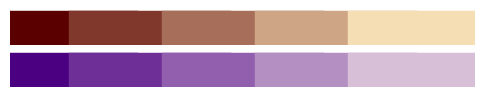

In [291]:
def make_brown_and_purple_color_array(num_colors):
    start_color = np.array([90, 0, 0])  # Maroon (RGB: 128, 0, 0)
    end_color = np.array([245, 222, 179])  # Wheat (RGB: 245, 222, 179)
    colors_brown = np.linspace(start_color, end_color, num=num_colors, dtype=int)

    start_color = np.array([75, 0, 130])  # Indigo (RGB: 75, 0, 130)
    end_color = np.array([216, 191, 216])  # Thistle (RGB: 216, 191, 216)
    colors_indigo_thistle = np.linspace(start_color, end_color, num=num_colors, dtype=int)

    # Convert RGB arrays to hex color codes
    colors_indigo_thistle_hex = ['#%02x%02x%02x' % tuple(color) for color in colors_indigo_thistle]
    colors_brown_hex = ['#%02x%02x%02x' % tuple(color) for color in colors_brown]
    return colors_brown_hex, colors_indigo_thistle_hex

colors_brown_hex, colors_indigo_thistle_hex=make_brown_and_purple_color_array(5)

fig, (ax,axP)= plt.subplots(2,1, figsize=(6, 1))
for i, color in enumerate(colors_brown_hex):
    ax.axhline(0, i / 5, (i + 1) / 5, color=color, linewidth=50)
ax.axis('off')
for i, color in enumerate(colors_indigo_thistle_hex):
    axP.axhline(0, i / 5, (i + 1) / 5, color=color , linewidth=50)
axP.axis('off')
plt.show()


In [292]:
def write_values_in_barh(ax):
    prev_width = 0
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        
        if width <1.5:
            continue

        # Get the color of the bar
        r, g, b, a = p.get_facecolor()

        # Calculate the luminance of the color
        luminance = 0.299*r + 0.587*g + 0.114*b

        # Choose the text color based on the luminance
        text_color = 'white' if luminance < 0.5 else 'black'
        ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center', 
            color=text_color)
        prev_width = width

In [293]:
dfSectorSeasonalFWcomp['2013':'2023']

Summer Liquid Runoff Ice Sheet  Summer Liquid Runoff Ice Caps  \
       Basins                                                                  
2013.0 SE                           34.617302                      13.951906   
       SW                           60.289978                       8.540026   
       CE                           56.523918                      11.277893   
       CW                           55.148003                       5.372565   
       NE                           43.768459                      14.820007   
...                                       ...                            ...   
2022.0 CE                           50.332199                       9.766074   
       CW                           60.054878                       4.499894   
       NE                           34.002495                      10.894258   
       NW                           39.737389                       3.091695   
       NO                           29.675182                      12.510793   

               Summer Liquid Runoff Tundra  Summer Precipitation Fjords  \
       Basins                                                             
2013.0 SE                        19.491568                     5.448102   
       SW                        32.384472                     5.405826   
       CE                        17.618881                     6.378761   
       CW                        17.101084                     2.872219   
       NE                        19.887516                     4.315382   
...                                    ...                          ...   
2022.0 CE                        20.781933                     4.976133   
       CW                        21.490803                     4.280931   
       NE                        28.240089                     2.808761   
       NW                         5.403870                     1.437664   
       NO                        16.421600                     1.877858   

               Summer Solid Ice discharge (weighted mean)  \
       Basins                                               
2013.0 SE                                       11.799496   
       SW                                        1.644106   
       CE                                        6.583571   
       CW                                        8.095149   
       NE                                        2.228478   
...                                                   ...   
2022.0 CE                                        7.364868   
       CW                                        7.233343   
       NE                                        2.604965   
       NW                                        9.524197   
       NO                                        2.263469   

               Winter Liquid Runoff Ice Sheet  Winter Liquid Runoff Ice Caps  \
       Basins                                                                  
2013.0 SE                            1.572778                       0.562670   
       SW                            1.865695                       0.142876   
       CE                            0.587895                       0.131856   
       CW                            0.164542                       0.034082   
       NE                            0.050548                       0.077491   
...                                       ...                            ...   
2022.0 CE                            0.677519                       0.145094   
       CW                            0.034347                       0.043773   
       NE                            0.047308                       0.081582   
       NW                            0.056563                       0.001804   
       NO                            0.011158                       0.005557   

               Winter Liquid Runoff Tundra  Winter Precipitation Fjords  \
       Basins                                                             
2013.0 SE    

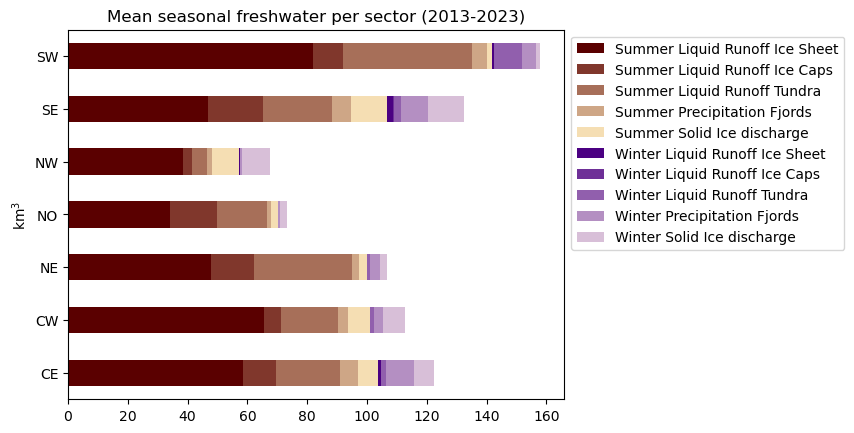

In [294]:
rename_solid = {'Solid Ice discharge (weighted mean)': 'Solid Ice Discharge', 'Winter Solid Ice discharge (weighted mean)': 'Winter Solid Ice discharge', 'Summer Solid Ice discharge (weighted mean)': 'Summer Solid Ice discharge'}

# Combine the two lists of hex color codes
colors_hex =  colors_brown_hex +colors_indigo_thistle_hex

fig,ax = plt.subplots(1, 1,)
dfSectorSeasonalFWcomp['2013':'2023'].groupby('Basins').mean().rename(columns=rename_solid).loc[basinorderkarlsson].plot(kind='barh', stacked=True, ylabel="km$^3$", legend=True, ax=ax, color=colors_hex)
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
ax.title.set_text("Mean seasonal freshwater per sector (2013-2023)")


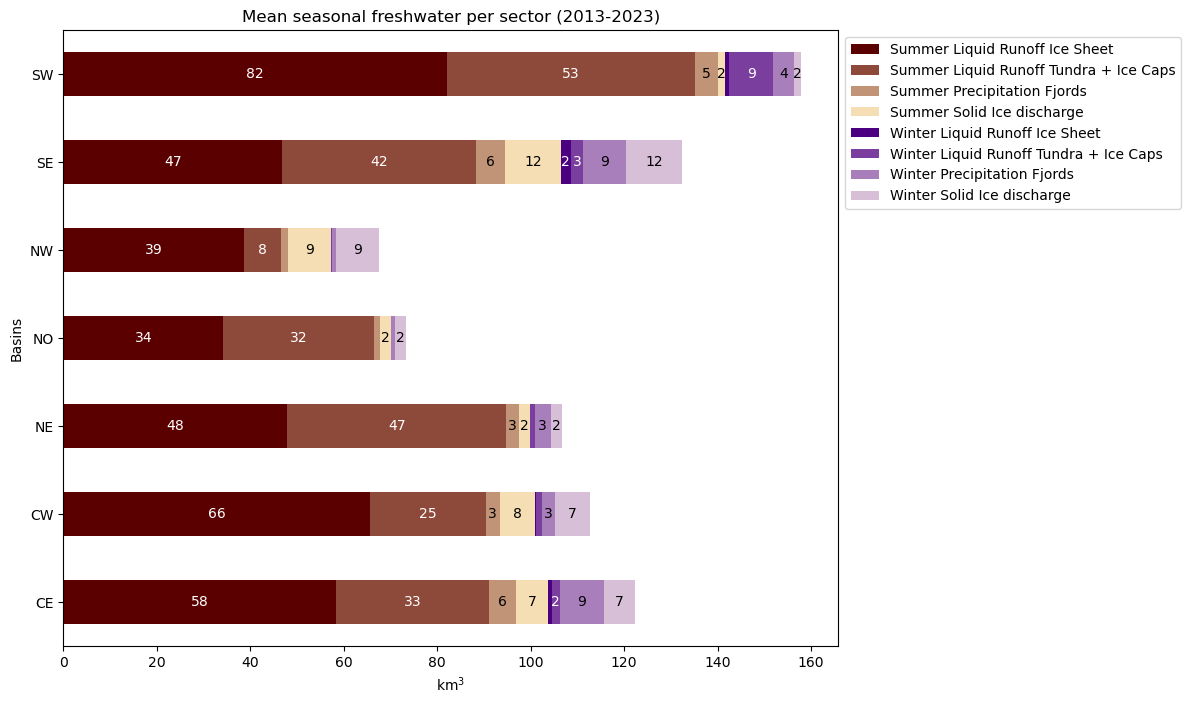

In [295]:
rename_solid = {'Solid Ice discharge (weighted mean)': 'Solid Ice discharge', 'Winter Solid Ice discharge (weighted mean)': 'Winter Solid Ice discharge', 'Summer Solid Ice discharge (weighted mean)': 'Summer Solid Ice discharge'}

# Combine the two lists of hex color codes
colors_brown_hex4, colors_indigo_thistle_hex4=make_brown_and_purple_color_array(4)
colors_hex4 =  colors_brown_hex4 +colors_indigo_thistle_hex4

# fig,ax = plt.subplots(1, 1,figsize=(5, 8)) 
fig,ax = plt.subplots(1, 1,figsize=(10,8))
# make a local variable
dfSectorSeasonalFWcomp_4_only =dfSectorSeasonalFWcomp['2013':'2023'].groupby('Basins').mean().rename(columns=rename_solid).loc[basinorderkarlsson]
dfSectorSeasonalFWcomp_4_only['Winter Liquid Runoff Tundra + Ice Caps'] = dfSectorSeasonalFWcomp_4_only['Winter Liquid Runoff Tundra'] + dfSectorSeasonalFWcomp_4_only['Winter Liquid Runoff Ice Caps']
dfSectorSeasonalFWcomp_4_only['Summer Liquid Runoff Tundra + Ice Caps'] = dfSectorSeasonalFWcomp_4_only['Summer Liquid Runoff Tundra'] + dfSectorSeasonalFWcomp_4_only['Summer Liquid Runoff Ice Caps']
dfSectorSeasonalFWcomp_4_only=dfSectorSeasonalFWcomp_4_only.loc[:,['Winter Solid Ice discharge', 'Winter Precipitation Fjords', 'Winter Liquid Runoff Tundra + Ice Caps', 'Winter Liquid Runoff Ice Sheet', 'Summer Solid Ice discharge', 'Summer Precipitation Fjords', 'Summer Liquid Runoff Tundra + Ice Caps', 'Summer Liquid Runoff Ice Sheet'][::-1]]
# dfSectorSeasonalFWcomp_4_only = dfSectorSeasonalFWcomp_4_only.div(dfSectorSeasonalFWcomp_4_only.sum(axis=1), axis=0)

dfSectorSeasonalFWcomp_4_only.plot(kind='barh', stacked=True, xlabel="km$^3$", legend=True, ax=ax, color=colors_hex4)
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
ax.title.set_text("Mean seasonal freshwater per sector (2013-2023)")
write_values_in_barh(ax)

Text(0.5, 0, 'km$^3$ w.e. per year')

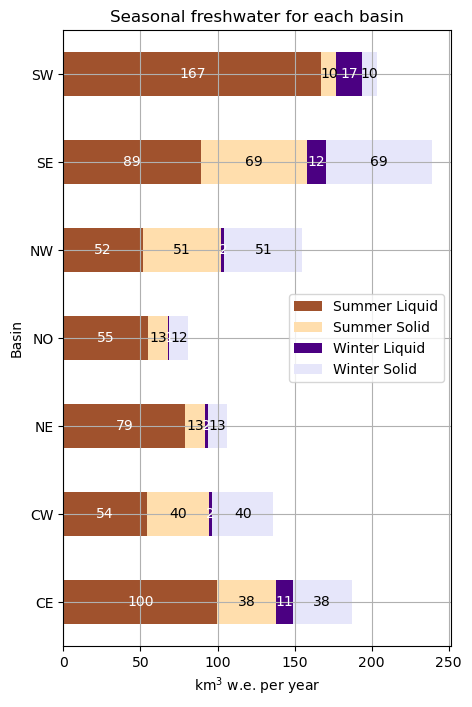

In [ ]:
colors_seasons = ['sienna', 'navajowhite', 'indigo', 'lavender']

# Create the bar plot and get the returned Axes object
ax = dfSectorSeasonalSum.groupby('Basin').mean().div(
    1
    # dfSectorSeasonalSum.groupby('Basin').mean().sum(axis=1), axis=0
    ).loc[basinorderkarlsson].plot(kind='barh', stacked=True, figsize=(5, 8), color=colors_seasons, title="Seasonal freshwater for each basin")
write_values_in_barh(ax)

plt.grid()

# km 3 w.e.
plt.xlabel("km$^3$ w.e. per year")